# Identification of a 1-DOF Mass-Spring-Damper System with the LSCE Algorithm

***

In our first notebook, we started our journey into system identification by exploring the AutoRegressive with eXogenous inputs (ARX) model. This model allowed us to predict the response of a 1-DOF mass-spring-damper system to an external force based on the (artificial) measurement of some input-output data. Now, we'll tackle the same 1-DOF mass-spring-damper system using a different approach: the Least Squares Complex Exponential (LSCE) algorithm.

While the ARX model allowed us to predict the system's response in time, it didn't directly give us insight into the system's fundamental characteristics like natural frequency and damping ratio. The LSCE algorithm, on the other hand, is specifically designed to extract these modal parameters. Think of it as a specialized tool that can decode the system's "DNA" - its natural vibration patterns.

In the realm of modal analysis, there are two main approaches:
1. **Time Domain Methods**: These analyze how the system's response evolves over time
2. **Frequency Domain Methods**: These look at how the system responds to different frequencies

The LSCE algorithm is a time domain method - just like the ARX model approach - that works by fitting complex exponentials to the system's Impulse Response Function (IRF). Imagine throwing a pebble into a pond - the resulting ripples are like our system's response, and the LSCE algorithm helps us understand the fundamental patterns in these ripples.

We'll follow a structured approach with these key steps:
* [Theoretical Background](#theoretical-background)
    * [IRF of the 1-DOF Mass-Spring-Damper System](#irf)
    * [LSCE Algorithm](#lsce)
* [Parameter Estimation from Impulse Response Data](#estimation-impulse-response)
    * [Data Generation](#data-generation-impulse)
    * [Parameter Estimation](#parameter-estimation-impulse)
    * [Model Validation](#model-validation-impulse)
* [Parameter Estimation from Random Response Data](#estimation-random-response)
    * [From Random Response to Impulse Response](#random-to-impulse)
    * [Data Generation](#data-generation-random)
    * [Parameter Estimation](#parameter-estimation-random)
    * [Model Validation](#model-validation-random)
* [Conclusion](#conclusion)

## Theoretical Background <a name="theoretical-background"></a>

***

### IRF of the 1-DOF Mass-Spring-Damper System <a name="irf"></a>

The key starting point of LSCE is the assumption that any linear system's impulse response can be expressed as a sum of complex exponentials. This isn't a random guess if you think about it, as the impulse response of an underdamped 1-DOF mass-spring-damper system is a decaying sinusoid, which can be written as a complex exponential.

To convince you of this, let's derive the impulse response of our 1-DOF system below and express it in complex exponential form.

![1-DOF Mass-Spring-Damper System](resources/01_MassSpringDamper.svg)

We recall the equation of motion for this system:

$$
m\ddot{x} + c\dot{x} + kx = F(t).
$$

The impulse response is the system's response to an impulse load. This type of load is characterized by a sudden rise in the applied force, followed by a rapid decrease to zero, as you can see in the plot below. The key assumption is that this impulse load is applied over a very short time interval $T_p$, which is much less than the system's natural vibration period $T_d$. Within this very short time, we can assume that the system doesn't have time to move, so the displacement remains zero. However, the velocity of the system can change during this time interval, as shown in the plot below.

![Impulse Load](resources/02_ImpulseLoad.svg)

We can find the velocity at the end of this time interval by integrating the equation of motion over the interval itself:

$$
\int_{0}^{T_p} \left( m\ddot{x} + c\dot{x} + kx \right) \mathrm{d}t = \int_{0}^{T_p} F(t) \mathrm{d}t.
$$

On the right hand side, the integral of the force is simply the impulse $I$:

$$
\int_{0}^{T_p} F(t) \mathrm{d}t = I.
$$

The integral of the left hand side reads:

$$
\left[m\dot{x}(t) + cx(t) + kx(t)t\right]_{0}^{T_p} = m\dot{x}(T_p),
$$

where we used our assumption that $x(0) = x(T_p) = 0$. This gives us the velocity at the end of the impulse:

$$
\dot{x}(T_p) = \frac{I}{m}.
$$

Essentially, the impulse load gives the system a velocity kick, which corresponds to considering the free vibration response of the system with an initial velocity $\dot{x}(0)\approx\dot{x}(T_p)=I/m$ and zero initial displacement.

The equation of motion is then a linear homogeneous differential equation with constant coefficients $\left(F(t)=0\right)$, and it has the following exponential solution:

$$
x(t) = A e^{st} = A e^{\left(s_r + is_i\right)t} = A e^{s_r t} e^{is_i t},
$$

where $A$ is an unknown constant and $s = s_r + is_i$ is a complex number. With the help of Euler's formula, we can see that $e^{is_i t}$ represents an oscillatory part of the solution:

$$
e^{is_i t} = \cos(s_i t) + i \sin(s_i t),
$$

where $s_i$ represents the frequency of oscillation of the system.

To find the solution for $x(t)$, we need to determine the real and imaginary parts of $s$. We differentiate $x(t)$ once and twice:

$$
\dot{x}(t) = s A e^{st}\\
\ddot{x}(t) = s^2 A e^{st},
$$

and we substitute these expressions into the equation of motion:

$$
m s^2 A e^{st} + c s A e^{st} + k A e^{st} = \left( m s^2 + c s + k \right) A e^{st} = 0.
$$

Since $A e^{st} \neq 0$, to find $s$ we need to solve the following equation:

$$
m s^2 + c s + k = 0,
$$

which is called the characteristic equation of the system. The solutions of this equation are the roots of the polynomial:

$$
s_{1,2} = -\frac{c \pm \sqrt{c^2 - 4mk}}{2m}.
$$

The roots of the characteristic equation can be real or complex, depending on the value of $c^2 - 4mk$.

The general solution of the homogeneous differential equation of the system is represented by the linear superposition of the individual solutions:

$$
x(t) = A_1 e^{s_1 t} + A_2 e^{s_2 t},
$$

where $A_1$ and $A_2$ are constants that depend on the initial conditions of the system.

It is convenient to rewrite the roots $s_{1,2}$ in the following way:

$$
s_{1,2} = -\frac{c \pm \sqrt{c^2 - 4mk}}{2m} = -\frac{c}{2m} \pm \left(\frac{c^2}{4m^2} - \frac{k}{m}\right)^{1/2} = -\frac{c}{2m} \pm \sqrt{\frac{k}{m}}\left(\frac{c^2}{4mk} - 1\right)^{1/2}.
$$

In this expression we can recognize the natural frequency of the undamped system $\omega_0 = \sqrt{k/m}$ and the damping ratio $\zeta = c/2\left(mk\right)^{1/2}$. Consequently, we can rewrite the roots as:

$$
s_{1,2} = -\zeta \omega_0 \pm \omega_0 \left(\zeta^2 - 1\right)^{1/2}.
$$

We can then assess the nature of the roots based on the value of the damping ratio $\zeta$:
* If $\zeta < 1$, we have two complex conjugate roots and the system is underdamped.
* If $\zeta = 1$, we have one double real root ($s_1=s_2$) and the system is critically damped.
* If $\zeta > 1$, we have two distinct real roots and the system is overdamped.

Since aerospace structures are typically characterized by underdamped behavior, we will focus on this case. The roots of the characteristic equation can be written as:

$$
s_{1,2} = -\zeta \omega_0 \pm i \omega_0 \sqrt{1 - \zeta^2}.
$$

We know that the imaginary part of the roots represents the frequency of oscillation of the system, which is called the damped natural frequency:

$$
\omega_d = \omega_0 \sqrt{1 - \zeta^2}.
$$

The general solution of the system can then be rewritten as:

$$
x(t) = A_1 e^{\left(-\zeta \omega_0 + i \omega_d\right)t} + A_2 e^{\left(-\zeta \omega_0 - i \omega_d\right)t}.
$$

See? A sum of complex exponentials! I told you that ;-)

Now, let's understand what $A_1$ and $A_2$ represent. Since we're dealing with a real physical system, $x(t)$ must be real. This means $A_1$ and $A_2$ must be complex conjugates. We can write them in polar form:

$$
A_1 = \frac{A}{2}e^{i\phi} \text{ and } A_2 = \frac{A}{2}e^{-i\phi},
$$

where $A$ is a real amplitude and $\phi$ is the phase angle.

Substituting these expressions:

$$
x(t)=\frac{A}{2}e^{i\phi} e^{(-\zeta \omega_0 + i \omega_d)t} + \frac{A}{2}e^{-i\phi} e^{(-\zeta \omega_0 - i \omega_d)t}
$$

Let's factor out the real exponential term $e^{-\zeta \omega_0 t}$:

$$
x(t)=\frac{A}{2}e^{-\zeta \omega_0 t}(e^{i\phi}e^{i\omega_d t} + e^{-i\phi}e^{-i\omega_d t})
$$

Now, recall Euler's formula for cosine:

$$
\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2}
$$

Looking at our expression, and considering $\theta = \omega_d t + \phi$, we can rewrite it as:

$$
x(t) = Ae^{-\zeta \omega_0 t}\cos(\omega_d t + \phi).
$$

This expression represents a decaying sinusoid, where $A$ is the constant amplitude, $e^{-\zeta \omega_0 t}$ is the decay term, and $\cos(\omega_d t + \phi)$ is the oscillatory part of the response. This last term indicates that the system vibrates at the damped natural frequency $\omega_d$ with a phase shift $\phi$. The amplitude $A$ and the phase shift $\phi$ are the two unknown constants that can be determined considering the initial conditions of the system.

### LSCE Algorithm <a name="lsce"></a>

Now that we understand how the impulse response of our 1-DOF system can be expressed as a sum of complex exponentials in continuous time:

$$x(t) = A_1e^{s_1t} + A_2e^{s_2t}$$

where $s_{1,2} = -\zeta\omega_0 \pm i\omega_d$, let's see how this translates to the discrete-time domain where our measurements actually live.

When we sample the continuous response $x(t)$ at regular intervals $\Delta t$, we get a sequence of discrete values $x[j]$ where $j$ is the sample index and $t = j\Delta t$. The discrete-time response can be written as:

$$x[j] = A_1e^{s_1j\Delta t} + A_2e^{s_2j\Delta t}$$

Let's define the discrete-time poles $\lambda_1 = e^{s_1\Delta t}$ and $\lambda_2 = e^{s_2\Delta t}$. This gives us:

$$x[j] = A_1\lambda_1^j + A_2\lambda_2^j$$

This is known as a Prony series. The key insight of the LSCE method is that this sequence satisfies a difference equation:

$$\beta_0x[j] + \beta_1x[j+1] + \beta_2x[j+2] = 0$$

where $\beta_0$, $\beta_1$, and $\beta_2$ are real coefficients we need to determine.

To understand why this difference equation must be true, let's substitute our expression for $x[j]$ into it:

$$\beta_0(A_1\lambda_1^j + A_2\lambda_2^j) + \beta_1(A_1\lambda_1^{j+1} + A_2\lambda_2^{j+1}) + \beta_2(A_1\lambda_1^{j+2} + A_2\lambda_2^{j+2}) = 0$$

Regrouping terms for each exponential:

$$A_1\lambda_1^j(\beta_0 + \beta_1\lambda_1 + \beta_2\lambda_1^2) + A_2\lambda_2^j(\beta_0 + \beta_1\lambda_2 + \beta_2\lambda_2^2) = 0$$

This equation must hold for all $j$. This means that both terms must be zero independently, leading to:

$$\beta_0 + \beta_1\lambda_1 + \beta_2\lambda_1^2 = 0$$
$$\beta_0 + \beta_1\lambda_2 + \beta_2\lambda_2^2 = 0$$

These equations hold if $\lambda_1$ and $\lambda_2$ are the roots of the quadratic equation:

$$\beta_0 + \beta_1\lambda + \beta_2\lambda^2 = 0$$

Essentially, by estimating the $\beta$ coefficients from our measured data and by solving the above quadratic equation, we can recover the discrete-time poles $\lambda_1$ and $\lambda_2$. From these, we can extract the modal parameters $\omega_0$ and $\zeta$.

The difference equation gives us a way to set up a system of equations using our impulse response data. In fact, given $N$ samples of the impulse response (with $j=0,1,2,\dots,N-1$), we can write the following system of difference equations:

$$
\begin{cases}
    \beta_0x[0] + \beta_1x[1] + \beta_2x[2] = 0 \\
    \beta_0x[1] + \beta_1x[2] + \beta_2x[3] = 0 \\
    \cdots \\
    \beta_0x[N-3] + \beta_1x[N-2] + \beta_2x[N-1] = 0.
\end{cases}
$$

By taking $\beta_2 = 1$, we can rewrite this system in matrix form:

$$
\begin{bmatrix} 
x[0] & x[1]\\
x[1] & x[2]\\
\vdots & \vdots\\
x[N-3] & x[N-2]
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix} = 
-\begin{bmatrix}
x[2] \\
x[3] \\
\vdots \\
x[N-1]
\end{bmatrix}
$$

Or more compactly:
$$\boldsymbol{X}\boldsymbol{\beta} = -\boldsymbol{y}$$

This is an overdetermined system that we can solve using the least squares method:

$$\boldsymbol{\beta} = -(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

Once we find $\beta_0$ and $\beta_1$, we can find $\lambda_1$ and $\lambda_2$ by solving the quadratic equation:

$$\beta_0 + \beta_1\lambda + \lambda^2 = 0$$

These roots are related to the system continuous-time poles $s_{1,2}$. Since the poles are determined by the undamped natural frequency $\omega_0$ and the damping ratio $\zeta$, as shown below:

$$
s_1 = -\zeta\omega_0 + i\omega_0\sqrt{1-\zeta^2}\\[2ex]
s_2 = -\zeta\omega_0 - i\omega_0\sqrt{1-\zeta^2},
$$

we can derive the natural frequency and the damping ratio as:

$$
\omega_0 = \frac{1}{\Delta t}\sqrt{\ln\lambda_1\ln\lambda_2}\\[2ex]
\zeta = \frac{-\ln\left(\lambda_1\lambda_2\right)}{2\omega_0\Delta t}.
$$

This process gives us direct access to the system's natural frequency and damping ratio, which was our original goal!

In the next sections, we'll implement this algorithm and apply it to our mass-spring-damper system.

## Parameter Estimation from Impulse Response Data <a name="estimation-impulse-response"></a>

***

Similarly to our previous notebook, we are now going to identify the parameters of the 1-DOF mass-spring-damper system using synthetic data. However, this time we are going to use the LSCE algorithm, which is specifically designed to work with impulse response data. Consequently, we are going to generate impulse response data to perform the identification and random response data to validate the model. For both excitations, we observe the response of the system for 20 seconds with a sampling frequency of 100 Hz, meaning that we acquire 2000 samples for each dataset.

### Data Generation <a name="data-generation-impulse"></a>

Let's start by defining the properties of our system and its equation of motion in state-space form.

In [1]:
MASS = 8  # mass [kg]
STIFFNESS = 4000  # stiffness constant [N/m]
DAMPING = 7  # damping constant [Ns/m]


def mass_spring_damper(state, t, force):
    """
    Define system dynamics: dq/dt = f(q, t)

    Parameters:
    state (array): [displacement, velocity]
    t (float): Time
    force (function): External force signal, inputted as a function

    Returns:
    array: State derivatives [velocity, acceleration]
    """
    # Unpack state variables
    x, xdot = state

    # Calculate acceleration based on the equation of motion
    xddot = (-STIFFNESS * x - DAMPING * xdot + force(t)) / MASS

    # Return state derivatives
    return [xdot, xddot]

Now we generate the impulse response data by defining an initial velocity given by an impulse of 50 Ns. We also need to define a dummy zero force signal to use the `odeint` solver with the `mass_spring_damper` function. 

We solve the system of differential equations and plot the impulse response data.

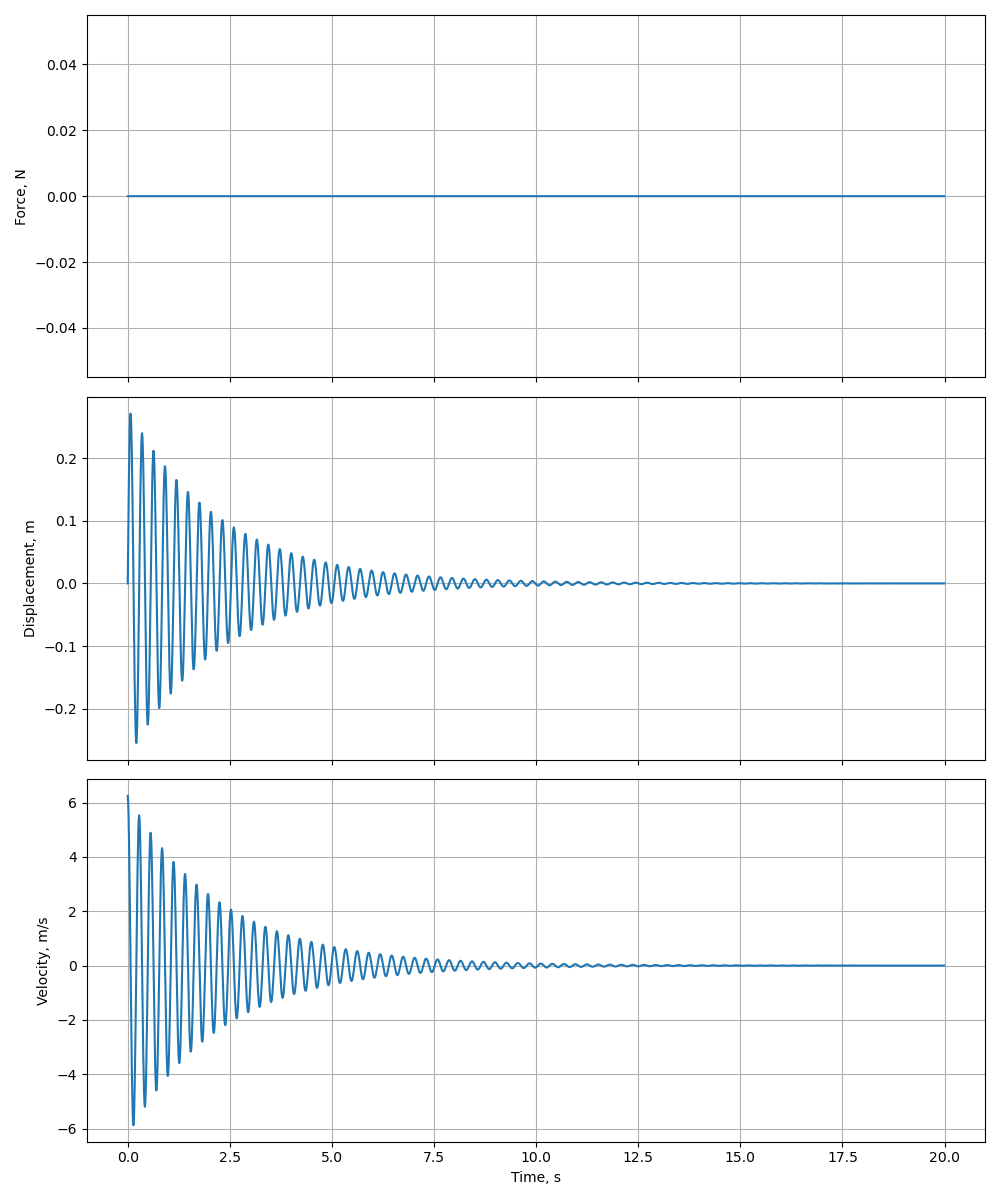

In [2]:
import numpy as np  # import numpy library for numerical calculations
from scipy.interpolate import interp1d  # import interp1d function for interpolation
from scipy.integrate import odeint  # import odeint function for solving ODEs
import matplotlib.pyplot as plt  # import matplotlib library for plotting

# Enable interactive plots
%matplotlib widget

# Create time array
t_span = 20  # [s]
f_sampling = 100  # sampling frequency [Hz]
t_vector = np.arange(0, t_span, 1 / f_sampling)  # time vector [s]

# Create interpolated force function
impulse_force_signal = np.zeros_like(t_vector)
impulse_force_function = interp1d(t_vector, impulse_force_signal, bounds_error=False, fill_value=0)

# Calculate initial velocity based on impulse
impulse = 50  # [Ns]
xdot0 = impulse / MASS

# Initial conditions [x0, xdot0]
initial_state = [0, xdot0]

# Solve ODE
solution = odeint(mass_spring_damper, initial_state, t_vector, args=(impulse_force_function,))

# Extract displacement and velocity
impulse_displacement = solution[:, 0]
impulse_velocity = solution[:, 1]

# Create figure with three subplots
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 12))

# Plot force
axes[0].plot(t_vector, impulse_force_signal)
axes[0].set_ylabel("Force, N")
axes[0].grid(True)

# Plot displacement
axes[1].plot(t_vector, impulse_displacement)
axes[1].set_ylabel("Displacement, m")
axes[1].grid(True)

# Plot velocity
axes[2].plot(t_vector, impulse_velocity)
axes[2].set_ylabel("Velocity, m/s")
axes[2].grid(True)
axes[2].set_xlabel("Time, s")

# Set layout and show plot
plt.tight_layout()
plt.show()

### Parameter Estimation <a name="parameter-estimation-impulse"></a>

We can now estimate the parameters of the system using the LSCE algorithm. We start by defining the function `estimate_lsce_parameters` that computes the $\beta$ coefficients.

In [3]:
def estimate_lsce_parameters(x):
    """
    Estimate the Least Squares Complex Exponential (LSCE) parameters

    Parameters:
    x (array): Output signal

    Returns:
    float: beta_0 parameter
    float: beta_1 parameter
    """
    # Find number of samples
    N = len(x)

    # Create output vector
    y = np.atleast_2d(x[2:]).T

    # Create observation matrix
    X = np.vstack([x[0 : N - 2], x[1 : N - 1]]).T

    # Calculate the LSCE parameters
    betas = -np.linalg.inv(X.T @ X) @ X.T @ y

    # Return the LSCE parameters
    return betas[0, 0], betas[1, 0]

Then we define the function `estimate_modal_parameters` that computes the natural frequency and damping ratio of the system from the $\beta$ coefficients.

In [4]:
def estimate_modal_parameters(beta_0, beta_1, fs):
    """
    Estimate the modal parameters

    Parameters:
    beta_0 (float): beta_0 parameter
    beta_1 (float): beta_1 parameter
    fs (float): Sampling frequency [Hz]

    Returns:
    float: natural frequency
    float: damping ratio
    """
    # Calculate the discrete-time poles
    lambdas = np.roots([1, beta_1, beta_0])

    # Calculate natural frequency and damping ratio
    omega = fs * np.sqrt(np.log(lambdas[0]) * np.log(lambdas[1]))
    zeta = -fs * np.log(lambdas[0] * lambdas[1]) / (2 * omega)

    # Return the modal parameters
    return np.real(omega), np.real(zeta)

Once we have calculated the estimated modal parameters, we can reuse the equation $\boldsymbol{X}\boldsymbol{\beta} = -\boldsymbol{y}$ to predict the system's output and compare the prediction with the measured output. To do this we define the function `compare_output`, which takes as input the output signal, the $\beta$ coefficients, and the time vector, and plots the measured and predicted output signals.

In [5]:
def compare_output(x, beta_0, beta_1, t):
    """
    Compare measured and estimated output using ARX parameters

    Parameters:
    x (array): Output data, shape (N,)
    beta_0 (float): beta_0 parameter
    beta_1 (float): beta_1 parameter
    t (array): Time vector, shape (N,)

    Returns:
    Axes: Matplotlib Axes object
    """
    # Find number of samples
    N = len(x)

    # Iterate over time vector to calculate estimated output
    y = np.zeros(N)
    y[0] = x[0]
    y[1] = x[1]
    for k in range(2, N):
        y[k] = -beta_0 * y[k - 2] - beta_1 * y[k - 1]

    # Plot measured and predicted output
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(t, x, label="Measured")
    ax.plot(t, y, label="Estimated")
    ax.set_xlabel("Time, s")
    ax.set_ylabel("Displacement, m")
    ax.legend()
    ax.grid(True)

    # Return Axes object
    return ax

We apply these functions to the impulse response data and print the estimated natural frequency and damping ratio.

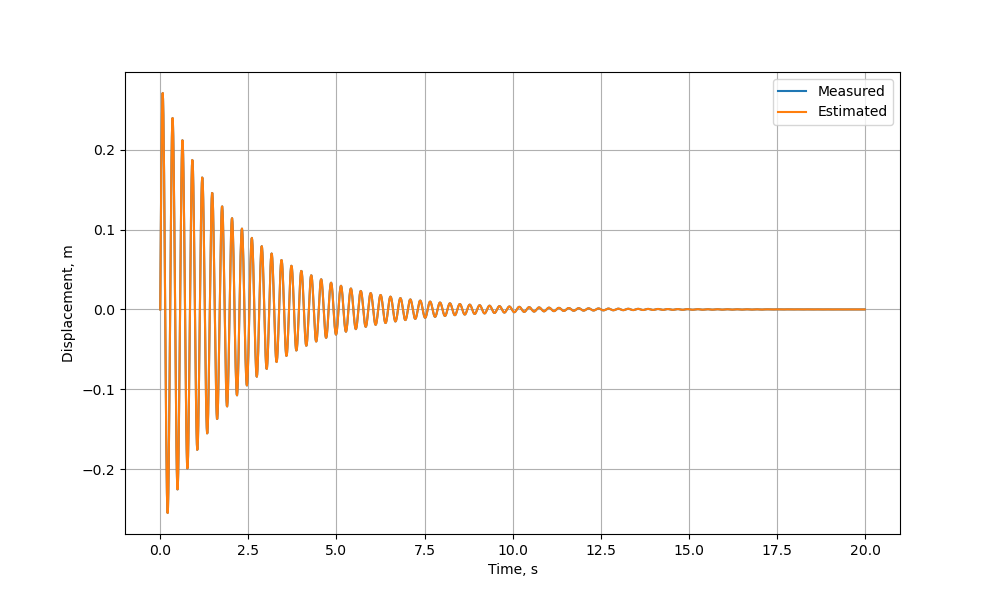


Natural frequency
- true: 22.36 rad/s
- estimated: 22.36 rad/s
Percentage difference: -0.00%

Damping ratio
- true:  0.02
- estimated: 0.02
Percentage difference: 0.00%



In [6]:
beta_0, beta_1 = estimate_lsce_parameters(impulse_displacement)
omega, zeta = estimate_modal_parameters(beta_0, beta_1, f_sampling)
compare_output(impulse_displacement, beta_0, beta_1, t_vector)
plt.show()

true_natural_frequency = np.sqrt(STIFFNESS / MASS)
true_damping_ratio = DAMPING / (2 * np.sqrt(MASS * STIFFNESS))
print(
    f"""
Natural frequency
- true: {true_natural_frequency:.2f} rad/s
- estimated: {omega:.2f} rad/s
Percentage difference: {(omega - true_natural_frequency) / true_natural_frequency * 100:.2f}%

Damping ratio
- true: {true_damping_ratio: .2f}
- estimated: {zeta:.2f}
Percentage difference: {(zeta - true_damping_ratio) / true_damping_ratio * 100:.2f}%
"""
)

We can observe that we basically have an exact match between the measured and predicted output signals, and between the true and estimated modal parameters. This result should be of no surprise, as we are using synthetic data where the only source of error is the numerical integration of the differential equations, which is very accurate.

### Model Validation <a name="model-validation-impulse"></a>

To validate the estimated model, we need to apply it to a different system response than the one used for the identification. However, for this purpose we can only use other impulse response data, as the difference equation that characterizes the LSCE algorithm is specifically designed for impulse response data and cannot be applied to forced response data. Consequently, we generate a new impulse response dataset based on a non-zero initial displacement and a zero initial velocity. We then predict the system's output using the estimated LSCE model and compare it with the measured output.

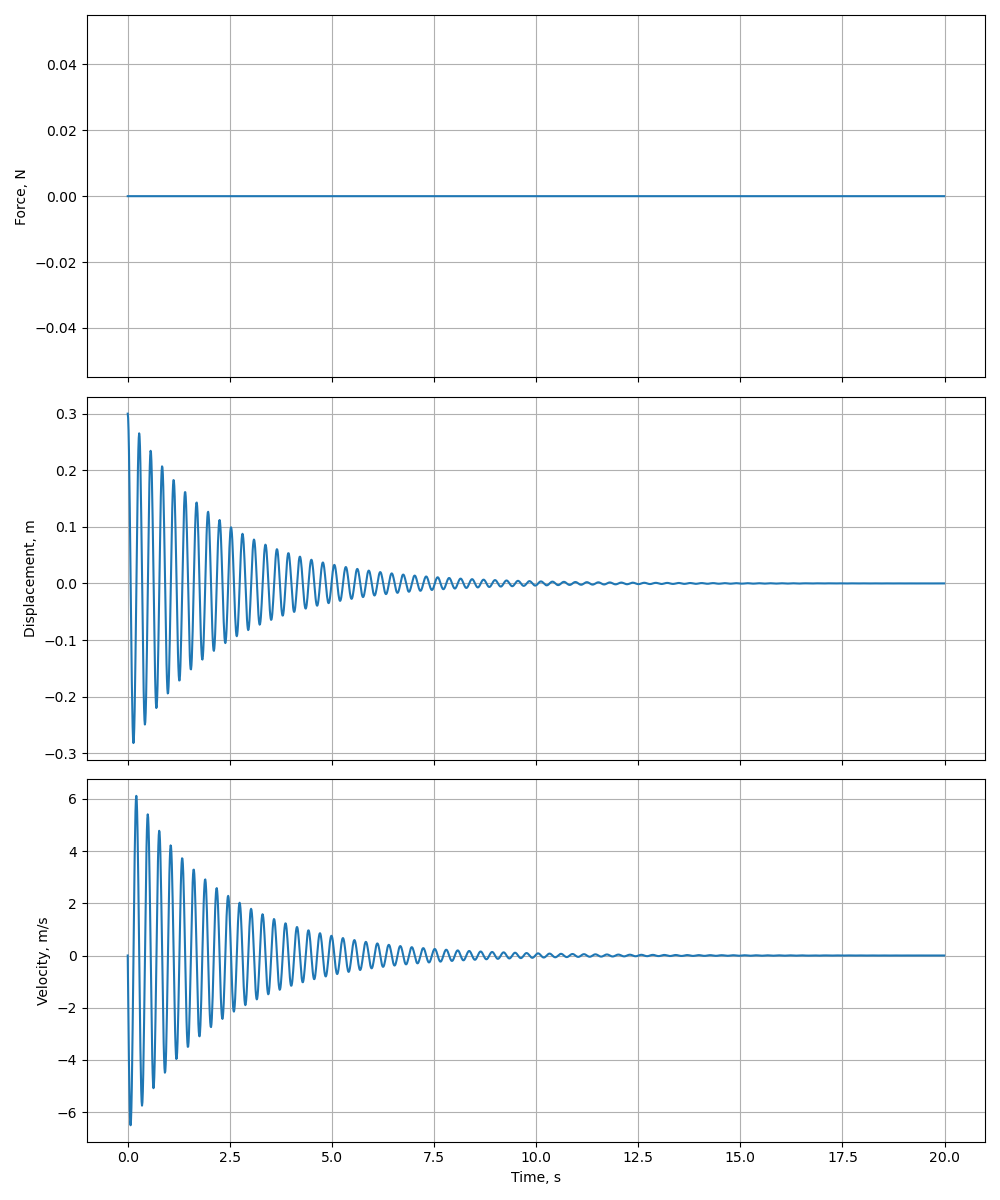

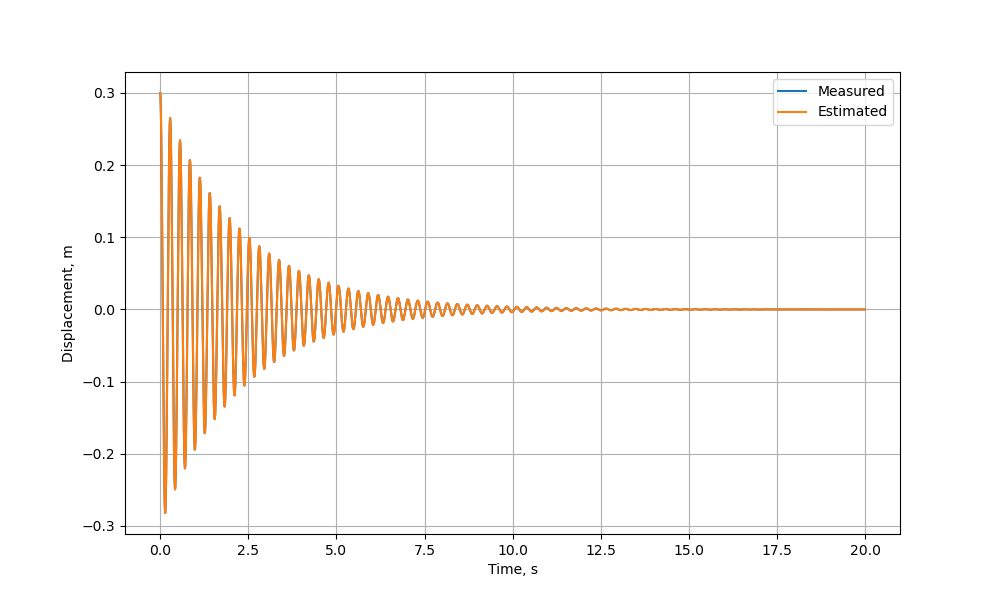

In [7]:
# Initial conditions [x0, xdot0]
x0 = 0.3  # initial displacement [m]
initial_state = [x0, 0]

# Solve ODE
solution = odeint(
    mass_spring_damper, initial_state, t_vector, args=(impulse_force_function,)
)

# Extract displacement and velocity
impulse_displacement = solution[:, 0]
impulse_velocity = solution[:, 1]

# Create figure with three subplots
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 12))

# Plot force
axes[0].plot(t_vector, impulse_force_signal)
axes[0].set_ylabel("Force, N")
axes[0].grid(True)

# Plot displacement
axes[1].plot(t_vector, impulse_displacement)
axes[1].set_ylabel("Displacement, m")
axes[1].grid(True)

# Plot velocity
axes[2].plot(t_vector, impulse_velocity)
axes[2].set_ylabel("Velocity, m/s")
axes[2].grid(True)
axes[2].set_xlabel("Time, s")

# Set layout and show plot
plt.tight_layout()
plt.show()

# Compare measured and estimated output
compare_output(impulse_displacement, beta_0, beta_1, t_vector)
plt.show()

The plot shows a perfect match between the measured and predicted output signals, confirming the success of the LSCE algorithm in identifying the dynamics of the system.

At this point, we should take a moment to appreciate the power of the LSCE algorithm, but also to reflect on its essential starting point: the impulse response data. In fact, the LSCE algorithm is specifically designed to work only with impulse response data. In our very simple example, we were able to generate a perfect impulse behavior by giving the system an initial velocity kick. However, in real-world applications, obtaining a perfect impulse response might be challenging.

Does this mean that the LSCE algorithm is not suitable for real-world applications? Not at all! In fact, there is a way to obtain the impulse response of a system from other types of response data, such as random response data. This is what we are going to explore in the next section.

## Parameter Estimation from Random Response Data <a name="estimation-random-response"></a>

***

To extract the impulse response from other types of excitation data, particularly from random excitation, we can use the relationship between the Frequency Response Function (FRF) and the Impulse Response Function (IRF). This relationship is a fundamental concept in system identification, and it allows us to extract the system's impulse response from its response to random excitation, which is easier to measure in an experimental setting.

In this section we are going to explore this relationship and apply it to our mass-spring-damper system.

### From Random Response to Impulse Response <a name="random-to-impulse"></a>

#### Understanding Linear Time-Invariant Systems

Before we dive into the relationship between FRF and IRF, let's understand why this relationship exists. Our mass-spring-damper system belongs to a class of systems called Linear Time-Invariant (LTI) systems. These systems have two important properties:

1. **Linearity**: If input $F_1(t)$ produces output $x_1(t)$, and input $F_2(t)$ produces output $x_2(t)$, then:
   - Input $aF_1(t)$ produces output $ax_1(t)$ (scaling)
   - Input $F_1(t) + F_2(t)$ produces output $x_1(t) + x_2(t)$ (superposition)

2. **Time-Invariance**: If input $F(t)$ produces output $x(t)$, then input $F(t-\tau)$ produces output $x(t-\tau)$ for any time shift $\tau$.

These properties lead us to a powerful way of describing how the system processes input signals: convolution. To understand convolution, let's build up the concept step by step.

Imagine you're pouring water (the input signal) into a fountain (our system). The fountain has a particular way of redistributing the water through various levels and spouts (the system's impulse response). If you pour in just a single drop of water (an impulse), the fountain creates a specific pattern of water distribution over time - some water falls quickly through the center, some takes longer paths through various levels. This pattern is our impulse response, $h(t)$.

Now, what happens when you pour in a continuous stream of water (a general input signal $F(t)$)? Each drop in that stream creates its own pattern, following the fountain's characteristic distribution, but starting at different times. The final water pattern you see (the output signal $x(t)$) is the sum of all these overlapping patterns.

This is exactly what convolution does mathematically. It takes each "drop" of our input signal at time $\tau$, weighted by its size $x(\tau)$, creates a corresponding impulse response pattern starting at that time $h(t-\tau)$, and adds up all these patterns over time:

$$x(t) = \int_{-\infty}^{\infty} h(t-\tau)F(\tau)d\tau = h(t) * F(t)$$

To understand this integral more concretely, let's break down what it does:
1. For each time $\tau$, it takes a piece of the input signal $F(\tau)$
2. It shifts the impulse response pattern to start at that time $h(t-\tau)$
3. It scales this shifted pattern by the input value $F(\tau)$
4. It adds up all these scaled and shifted patterns (that's what the integral does)

In our mass-spring-damper system, this process captures how the system "remembers" and combines its past inputs. When you push the mass, it doesn't just respond to the current push - it's still responding to all the previous pushes, each creating its own decaying oscillation pattern. Convolution mathematically describes how all these responses add up to create the final motion we observe.

Note that here we have described convolution in terms of input force signal $F(t)$ and output displacement signal $x(t)$, for the sake of consistency with our previous derivations. However, the same concept applies to any other input-output pair, as long as the system is linear and time-invariant.

#### The Frequency Response Function (FRF)

When we excite a system with a sinusoidal input at frequency $\omega$:

$$F(t) = F_0\sin(\omega t),$$

the steady-state output of an LTI system will also be sinusoidal at the same frequency, but with different amplitude and phase:

$$x(t) = X\sin(\omega t - \phi).$$

The FRF, typically denoted as $H(\omega)$, describes how the system modifies the amplitude and phase of sinusoidal inputs at each frequency. It's a complex-valued function:

$$H(\omega) = |H(\omega)|e^{-i\phi(\omega)}$$

where:
- $|H(\omega)|$ is the magnitude response (how much the system amplifies or attenuates each frequency)
- $\phi(\omega)$ is the phase response (how much the system delays each frequency)

To better understand this concept, let's derive the FRF of our mass-spring-damper system. To do this, we need to substitute the expressions for $F(t)$ and $x(t)$ into the equation of motion:

$$
m\left(-\omega^2X\sin\left(\omega t - \phi\right)\right) + c\left(\omega X\cos\left(\omega t - \phi\right)\right) + kX\sin\left(\omega t - \phi\right) = F_0\sin(\omega t)\\[3ex]
m\left(\omega^2X\sin\left(\omega t - \phi + \pi\right)\right) + c\left(\omega X\sin\left(\omega t - \phi + \pi/2\right)\right) + kX\sin\left(\omega t - \phi\right) = F_0\sin(\omega t)\\[3ex]
m\omega^2X\sin\left(\omega t - \phi + \pi\right) + c\omega X\sin\left(\omega t - \phi + \pi/2\right) + kX\sin\left(\omega t - \phi\right) = F_0\sin(\omega t)
$$

All the terms in the last equation correspond to forces, and the sine functions imply that these individual forces are being projected on a particular axis in some coordinate system. For example, if you imagine a complex plane, the horizontal axis corresponds to the cosine projections and the vertical axis corresponds to the sine projections. Based on this interpretation, we can draw the polygon of forces in the figure below.

![Polygon of Forces](resources/02_PolygonForces.svg)

Now, considering the triangle having as hypotenuse the force $F_0$, we can write the following relationships:

$$
F_0^2 = \left(kX - m\omega^2X\right)^2 + \left(c\omega X\right)^2\\[2ex]
\tan\phi = \frac{c\omega X}{kX - m\omega^2X}= \frac{c\omega}{k - m\omega^2}
$$

By rearranging these equations, we can express the magnitude and phase of the FRF as:

$$
|H(\omega)| = \frac{X}{F_0} = \frac{1}{\sqrt{\left(k - m\omega^2\right)^2 + \left(c\omega\right)^2}}\\[2ex]
\angle H(\omega) = \phi = \arctan\left(\frac{c\omega}{k - m\omega^2}\right)
$$

The frequency response function of our mass-spring-damper system is then:

$$
H(\omega) = \frac{1}{\sqrt{\left(k - m\omega^2\right)^2 + \left(c\omega\right)^2}}e^{-i\phi}
$$

Essentially, if we know the parameters of the system and the frequency of the input signal, the FRF allows us to predict the amplitude and phase of the system's response at that frequency.

#### The Fourier Transform Connection

If for our mass-spring-damper we have been able to derive the FRF of the system analytically, we must realize that this is not possible in a real experimental setting. In the latter, what we have is time-domain measurements of the input and output signals. So, how can we determine the FRF from these measurements?

This is where the Fourier transform comes in. Named after Joseph Fourier, this mathematical tool allows us to decompose any signal into a sum of sinusoidal components. Think of it like a prism breaking white light into its constituent colors - the Fourier transform breaks a complex time-domain signal into its frequency components.

For any time-domain signal $s(t)$, its Fourier transform $S(\omega)$ is given by:

$$S(\omega) = \mathcal{F}\{s(t)\} = \int_{-\infty}^{\infty} s(t)e^{-i\omega t}dt$$

Each value of $S(\omega)$ tells us how much of frequency $\omega$ is present in our original signal. The complex exponential $e^{-i\omega t}$ acts like a "frequency detector" - when we multiply our signal by this exponential and integrate, we get a large value when the signal contains that frequency component, and a small value when it doesn't.

Now, here's where things get interesting. Remember our convolution equation from earlier:

$$x(t) = \int_{-\infty}^{\infty} h(t-\tau)F(\tau)d\tau = h(t) * F(t)$$

When we apply the Fourier transform to both sides of this equation, something remarkable happens. A fundamental property of the Fourier transform states that the transform of a convolution of two signals equals the product of their individual transforms:

$$\mathcal{F}\{x(t)\} = \mathcal{F}\{h(t) * F(t)\} = \mathcal{F}\{h(t)\}\mathcal{F}\{F(t)\}$$

Therefore:
$$X(\omega) = H(\omega)F(\omega)$$

In other words, the Fourier transform of the impulse response is the FRF itself! This is a profound simplification, as in the frequency domain, the complex convolution operation becomes simple multiplication. This means we can find the FRF by dividing the Fourier transform of the output by the Fourier transform of the input:

$$H(\omega) = \frac{X(\omega)}{F(\omega)}$$

This gives us a practical way to determine the FRF from experimental measurements:
1. Record the input signal $F(t)$ and the output signal $x(t)$
2. Compute their Fourier transforms $F(\omega)$ and $X(\omega)$
3. Divide $X(\omega)$ by $F(\omega)$ to obtain $H(\omega)$

Now, here's where random excitation becomes particularly useful. When we excite a system with white noise:
1. The input spectrum $X(\omega)$ is constant across all frequencies
2. This means it excites all frequencies equally, giving us complete information about the system's behavior
3. The output spectrum $Y(\omega)$ directly reflects the system's frequency response, scaled by the input magnitude

Once we have $H(\omega)$, our ultimate goal is to obtain the impulse response $h(t)$ for use in the LSCE algorithm. Just as the Fourier transform takes us from time to frequency domain, we need its counterpart - the inverse Fourier transform - to take us back:

$$h(t) = \mathcal{F}^{-1}\{H(\omega)\} = \frac{1}{2\pi}\int_{-\infty}^{\infty} H(\omega)e^{i\omega t}d\omega$$

Here, each value of $h(t)$ tells us how the different frequency components of $H(\omega)$ combine at time $t$. The complex exponential $e^{i\omega t}$ now acts like a "time reconstructor" - when we multiply our frequency spectrum by this exponential and integrate, we add up all the frequency components with their proper phases to reconstruct the signal at that specific time instant.

This transformation brings us full circle, letting us recover the time-domain impulse response from the frequency-domain FRF:

$$h(t) = \mathcal{F}^{-1}\left\{\frac{X(\omega)}{F(\omega)}\right\}$$

This recovered impulse response contains the same modal information (natural frequency and damping ratio) as the direct impulse response we measured earlier. We can then feed it into our LSCE algorithm to identify these parameters.

Now we are going to implement this process step by step:
1. Apply the Fourier transform to the previously generated random response data to obtain $F(\omega)$ and $X(\omega)$
2. Compute the FRF $H(\omega)$
3. Apply the inverse Fourier transform to obtain the impulse response $h(t)$
4. Apply the LSCE algorithm to identify the modal parameters
5. Validate the model by comparing the predicted output with the measured output

### Data Generation <a name="data-generation-random"></a>

We create a random input force signal by generating random samples from a normal distribution with zero mean and unit variance, and then by scaling the signal to have a Root Mean Square (RMS) value of 200 N. Successively we use this signal to simluated the response of the mass-spring-damper system with zero initial conditions.

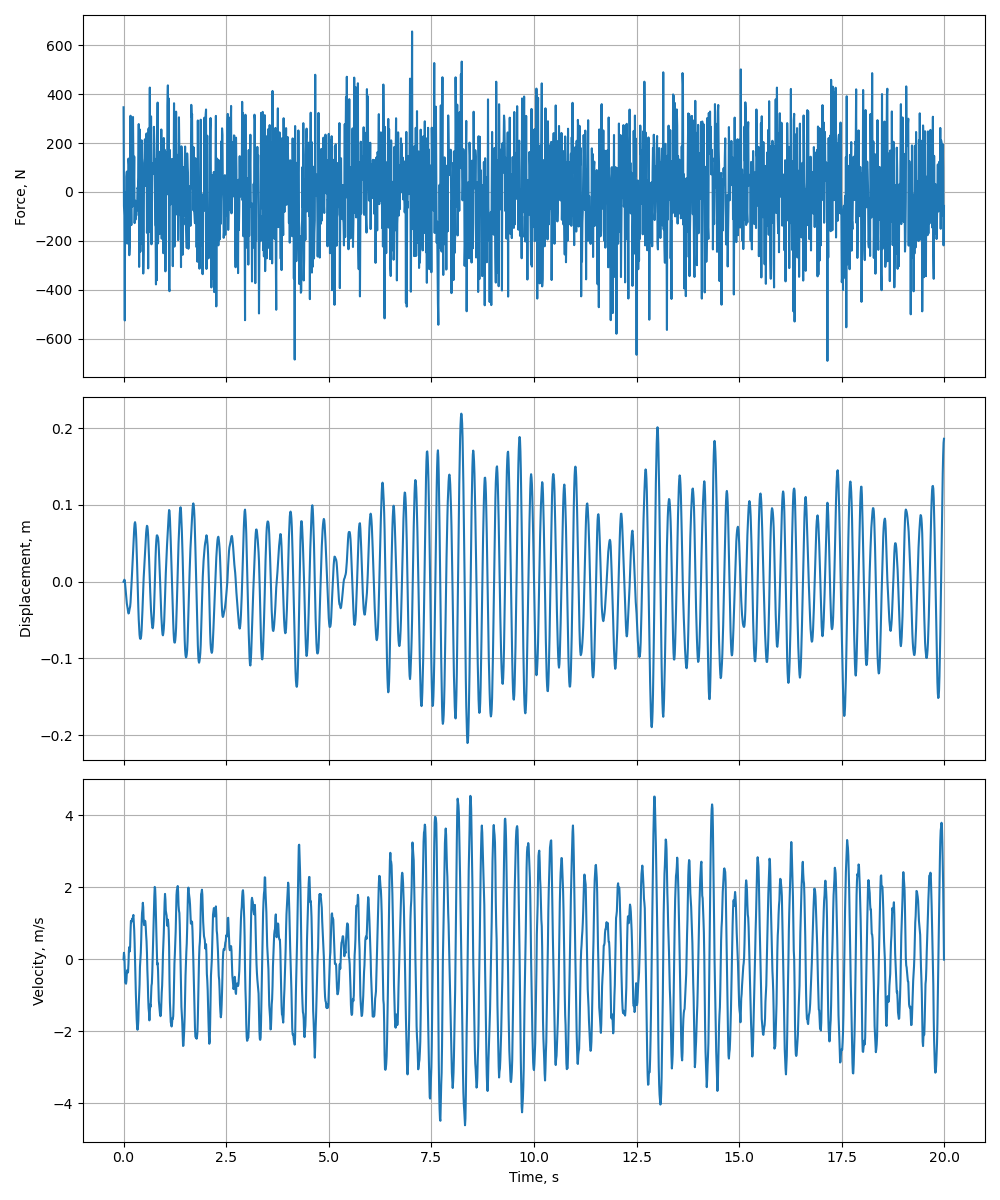

In [8]:
# Generate random force signal
np.random.seed(11)  # set random seed for reproducibility
force_rms = 200  # RMS of the force signal [N]
random_signal = np.random.normal(
    size=len(t_vector)
)  # random signal with normal distribution centered at 0
random_force_signal = random_signal * (
    force_rms / np.sqrt(np.mean(random_signal**2))
)  # scale random signal to desired RMS [N]

# Create interpolated force function
random_force_function = interp1d(
    t_vector, random_force_signal, bounds_error=False, fill_value=0
)

# Solve ODE
initial_state = [0, 0]  # zero-displacement and zero-velocity initial conditions
solution = odeint(
    mass_spring_damper, initial_state, t_vector, args=(random_force_function,)
)

# Extract displacement and velocity
random_displacement = solution[:, 0]
random_velocity = solution[:, 1]

# Create figure with three subplots
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 12))

# Plot force
axes[0].plot(t_vector, random_force_signal)
axes[0].set_ylabel("Force, N")
axes[0].grid(True)

# Plot displacement
axes[1].plot(t_vector, random_displacement)
axes[1].set_ylabel("Displacement, m")
axes[1].grid(True)

# Plot velocity
axes[2].plot(t_vector, random_velocity)
axes[2].set_ylabel("Velocity, m/s")
axes[2].grid(True)
axes[2].set_xlabel("Time, s")

# Set layout and show plot
plt.tight_layout()
plt.show()

Once obtained the random response data, we can apply the Fourier transform to obtain the input and output frequency spectra. However, since we're working with discrete-time signals sampled at regular intervals $\Delta t$, we need to use the Discrete Fourier Transform (DFT) instead of the continuous Fourier transform.

For a discrete signal $s[n]$ of length $N$, the DFT is given by:

$$S[k] = \sum_{n=0}^{N-1} s[n]e^{-i2\pi kn/N}$$

where:
- $s[n]$ is the signal value at the $n$-th sample
- $S[k]$ is the $k$-th frequency component
- $k$ ranges from 0 to $N-1$
- The frequency corresponding to index $k$ is $f_k = k/(N\Delta t)$

To compute the DFT efficiently, we'll use the Fast Fourier Transform (FFT) algorithm, implemented in SciPy's `fft` function. The FFT is computationally efficient version of the DFT that reduces the number of operations from $O(N^2)$ to $O(N\log N)$.

In [9]:
from scipy import fft

# Calculate FFT for input signal
input_fft = fft.fft(random_force_signal)

# Calculate FFT for output signal
output_fft = fft.fft(random_displacement)

To understand the frequency content of our input force and output displacement signals, we create a function `plot_magnitude_spectrum` that computes and displays the magnitude of their Fourier transforms. Since we're analyzing real-valued signals (our physical force and displacement measurements), their Fourier transforms have a special property: they are symmetric around zero frequency. This symmetry means that the negative frequency components are mirror images of the positive frequency components. This is not just a mathematical curiosity - it reflects the fact that any real signal can be decomposed into cosine waves, each of which can be represented as a sum of positive and negative frequency complex exponentials with conjugate coefficients. Because of this symmetry, we only need to look at the positive frequencies to understand our signal's frequency content, so our function masks out the negative frequencies to avoid showing redundant information.

The magnitude spectrum tells us how strongly each frequency is present in our signals, giving us insights into both the quality of our excitation and our system's response. We display these magnitudes in decibels (dB), which is a logarithmic scale obtained with the following formula:

$$
\text{Magnitude (dB)} = 20\log_{10}\left(\frac{|X|}{X_\mathrm{ref}}\right),
$$

where $|X|$ is the absolute value of our spectral component and $X_{\text{ref}}$ is a reference value (often taken as 1 unit).

We use this logarithmic scale because our signals contain frequency components with vastly different strengths - some might be hundreds or thousands of times stronger than others. The logarithmic decibel scale makes these differences visible and manageable in a single plot. For instance, a difference of 20 dB between two frequencies means the stronger frequency component has ten times the magnitude of the weaker one, a difference of 40 dB means a hundred times, and so on.

When we look at the input force spectrum, we want to verify that our random excitation is providing roughly equal energy across all frequencies of interest, which would appear as a relatively flat spectrum. The output displacement spectrum, on the other hand, should reveal how our system responds to this excitation, with an expected peak near the natural frequency where the system amplifies the input motion most strongly.

In [10]:
def plot_magnitude_spectrum(frequencies, spectrum, title):
    """Plot magnitude spectrum of a signal

    Parameters:
    frequencies (array): Frequency vector
    spectrum (array): Complex spectrum values
    title (str): Plot title
    """
    # Get positive frequencies only (since spectrum is symmetric for real signals)
    pos_mask = frequencies >= 0
    pos_freqs = frequencies[pos_mask]
    pos_spectrum = spectrum[pos_mask]

    # Calculate magnitude in dB
    magnitude_db = 20 * np.log10(np.abs(pos_spectrum))

    # Create figure
    plt.figure(figsize=(10, 6))
    plt.plot(pos_freqs, magnitude_db)
    plt.ylabel(f"Magnitude, dB")
    plt.xlabel("Frequency, Hz")
    plt.grid(True)
    plt.title(f"{title} Magnitude Spectrum")

    return plt.gca()

We calculate the frequency values corresponding to each DFT index and plot the magnitude spectra of the input force and output displacement signals.

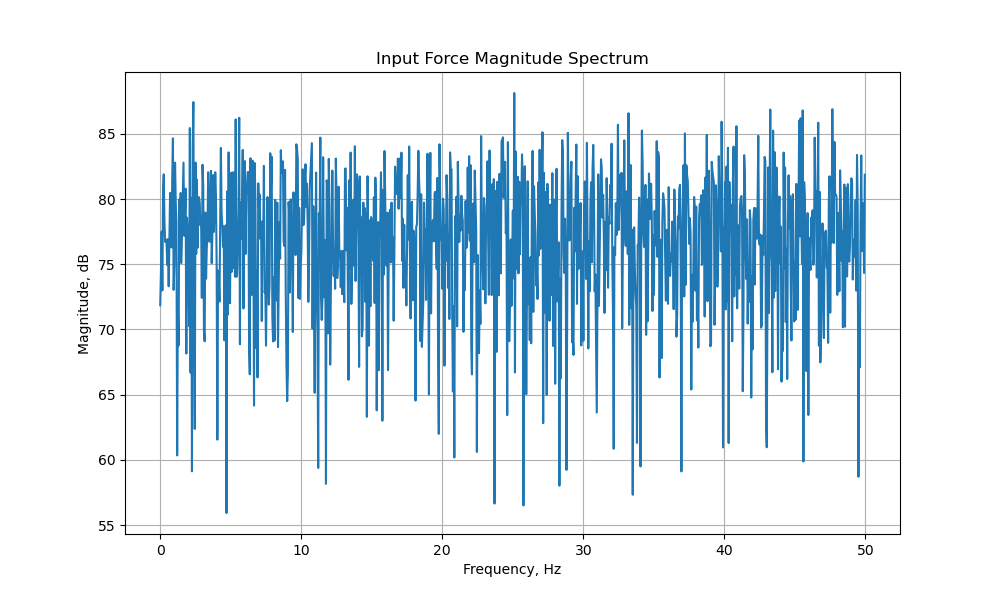

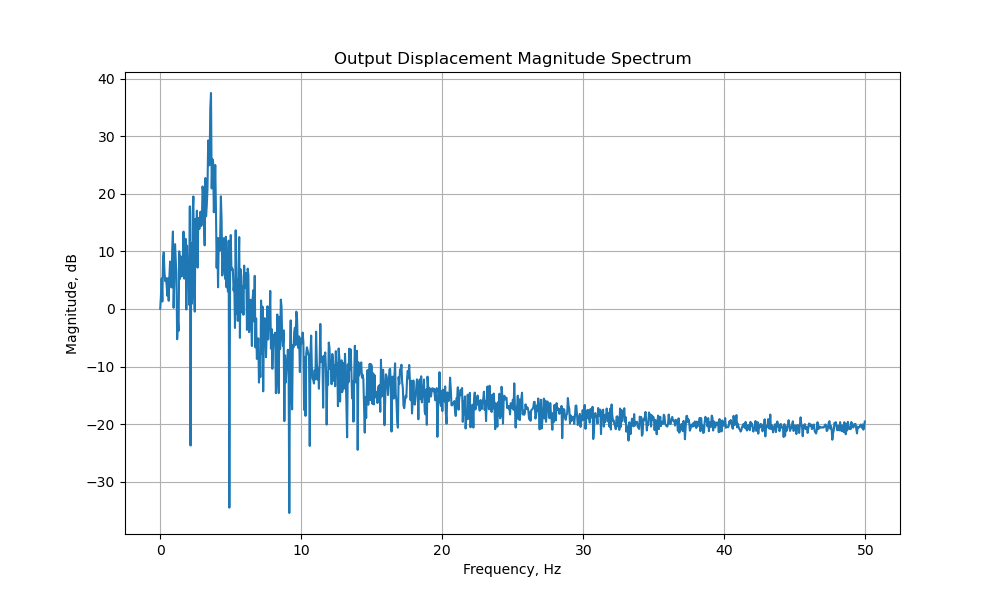

In [11]:
# Get frequencies corresponding to the FFT
frequencies = fft.fftfreq(len(random_force_signal), 1 / f_sampling)

# Plot input spectrum
plot_magnitude_spectrum(frequencies, input_fft, "Input Force")
plt.show()

# Plot output spectrum
plot_magnitude_spectrum(frequencies, output_fft, "Output Displacement")
plt.show()

Looking at these magnitude spectra, we observe that they range from 0 to 50 Hz. This upper limit is not arbitrary - it is closely related to our sampling frequency of 100 Hz through what is known as the Nyquist frequency. The Nyquist frequency, which is half the sampling frequency, represents the highest frequency that can be accurately represented in a discretely sampled signal. This fundamental limit exists because to accurately capture a sinusoidal signal, we need at least two samples per cycle. If we sample a signal containing frequencies above the Nyquist frequency, these high-frequency components will appear as lower-frequency components in our sampled signal, a phenomenon known as aliasing. Therefore, with our sampling frequency of 100 Hz, our Nyquist frequency is 50 Hz, which explains the frequency range in our plots.

The magnitude spectrum of the input force is not perfectly flat as theoretical white noise would be, despite we designed the input signal to be "random" with a normal distribution. This is because what we're seeing is a single realization of a random process. To understand this better, imagine rolling a fair six-sided die. While we expect each number to appear with equal probability over many rolls (analogous to a flat spectrum), any finite sequence of rolls (a single realization) will show some numbers appearing more frequently than others. Similarly, our input force spectrum shows variations around an average level of approximately 75-80 dB, with peaks and valleys that make it appear "noisy."

The seemingly erratic nature of the spectrum is actually a fundamental characteristic of finite-length random signals, known as spectral leakage. When we perform a Fourier transform on a finite-length signal, we're essentially looking at the signal through a rectangular window, which causes energy from each frequency component to "leak" into neighboring frequencies. This leakage manifests as the jagged appearance in our spectrum.

The output displacement spectrum tells a different but related story. It shows a clear peak around 3.6 Hz (approximately 22 rad/s), which corresponds to the natural frequency of our mass-spring-damper system. This peak occurs because the system amplifies input frequencies near its natural frequency much more than other frequencies. The magnitude drops off significantly at higher frequencies, which is characteristic of a second-order system like our mass-spring-damper.

The output spectrum also appears noisy, but for a slightly different reason than the input spectrum. The noise in the output spectrum comes partly from the system's response to the irregular input excitation - at each frequency, the output magnitude is the product of the input magnitude and the system's frequency response function (FRF) magnitude. When our input has a spike at some frequency, this spike gets modified by the system's FRF but still appears in the output, like the system is coloring the randomness of the input with its own characteristics. Additionally, the system's inherent filtering behavior affects how this noise appears across different frequencies. At frequencies up to and including the resonance region (approximately 0-10 Hz in our case), the system's FRF has significant magnitude, resulting in prominent variations in the output spectrum that reflect the input's randomness. At higher frequencies, the system's FRF magnitude decreases rapidly, strongly attenuating both the input signal and its variations, which explains the smoother appearance of the output spectrum in this region. Furthermore, the same spectral leakage effects that affected the input spectrum also affect the output spectrum, contributing to its noisy appearance.

One important observation is that despite the noisy appearance of both spectra, we can still clearly identify the system's key dynamic characteristics. The output spectrum's dominant peak at the natural frequency emerges clearly above the background variations, demonstrating that random excitation can effectively reveal a system's dynamic properties even with a single, finite-length measurement.

In a practical experimental setting, we would typically average multiple measurements or use longer time records to obtain smoother spectra. This process, known as spectral averaging, would help reduce the random variations while preserving the underlying system characteristics. However, even with a single realization as shown here, we can extract valuable information about the system's behavior.

The next step is to compute the FRF $H(\omega)$ by dividing the output displacement spectrum by the input force spectrum.

In [12]:
frf = output_fft / input_fft

To visualize the FRF, we create the function `plot_spectrum`, which displays the magnitude and phase of the FRF as a function of frequency. The magnitude plot shows how the system amplifies or attenuates each frequency, while the phase plot shows how the system delays or advances each frequency. The phase is particularly important because it tells us how the system responds to different frequencies over time. For example, a phase shift of $\pi/2$ (90 degrees) means the system responds to a frequency by leading the input signal by a quarter of a period, while a phase shift of $-\pi/2$ means the system lags the input signal by a quarter of a period.

In [13]:
def plot_spectrum(frequencies, spectrum, title):
    """Plot magnitude and phase spectrum of a signal

    Parameters:
    frequencies (array): Frequency vector
    spectrum (array): Complex spectrum values
    title (str): Plot title
    """
    # Get positive frequencies only (since spectrum is symmetric for real signals)
    pos_mask = frequencies >= 0
    pos_freqs = frequencies[pos_mask]
    pos_spectrum = spectrum[pos_mask]

    # Calculate magnitude and phase
    magnitude_db = 20 * np.log10(np.abs(pos_spectrum))
    phase = np.angle(pos_spectrum, deg=True)

    # Create figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

    # Plot magnitude
    axes[0].plot(pos_freqs, magnitude_db)
    axes[0].set_ylabel("Magnitude")
    axes[0].grid(True)
    axes[0].set_title(f"{title} Magnitude Spectrum")

    # Plot phase
    axes[1].plot(pos_freqs, phase)
    axes[1].set_ylabel("Phase, deg")
    axes[1].set_xlabel("Frequency, Hz")
    axes[1].grid(True)
    axes[1].set_title(f"{title} Phase Spectrum")

    return fig, axes

We then plot the magnitude and phase of our system's FRF.

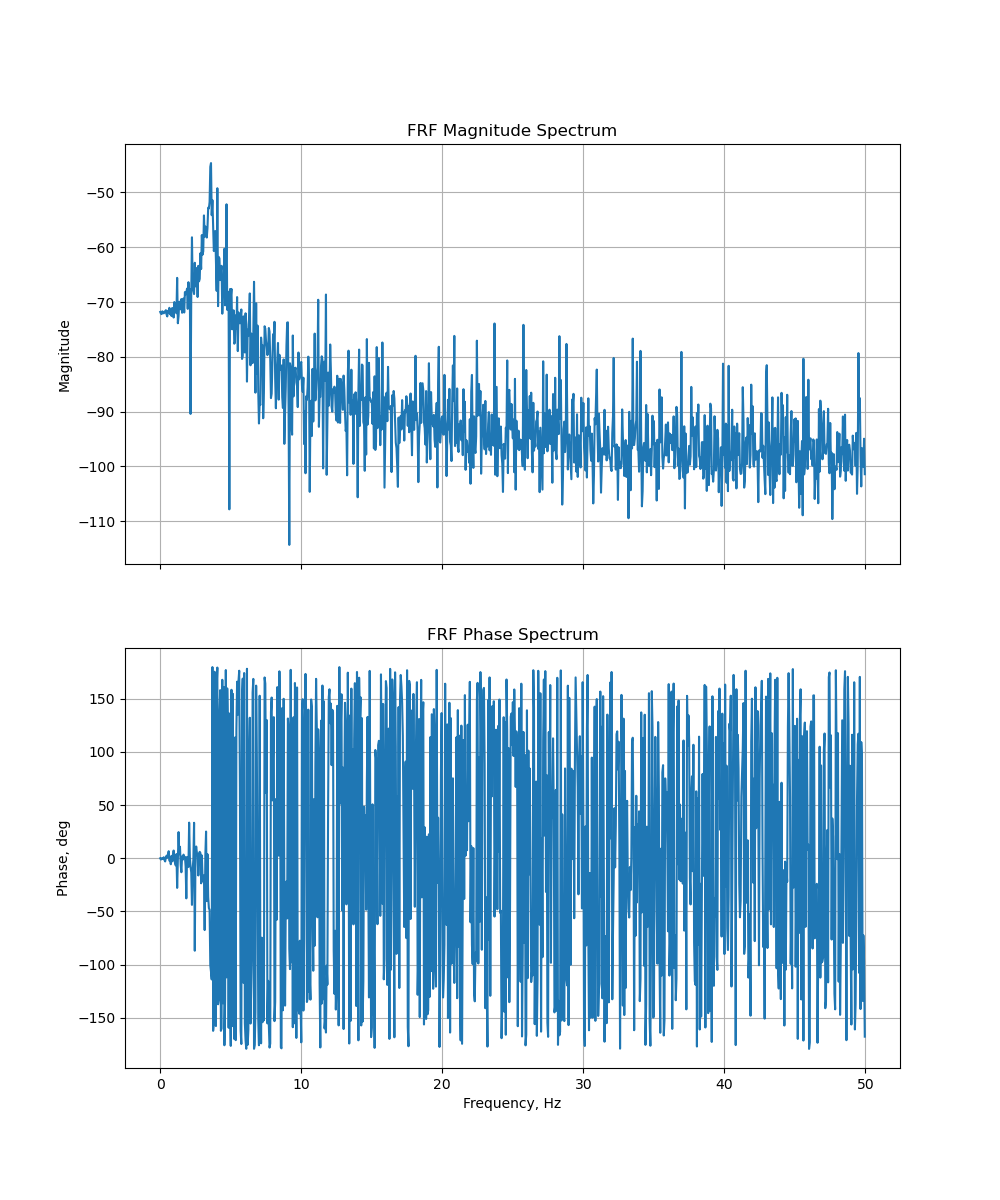

In [14]:
_, _ = plot_spectrum(frequencies, frf, "FRF")

The magnitude plot shows a clear resonance peak around 3.6 Hz, matching what we observed in the output spectrum. However, both the magnitude and phase plots appear quite noisy, especially at higher frequencies. This noisiness isn't a characteristic of the actual system - a mass-spring-damper system should have smooth FRF curves. Instead, it stems from two main sources.

First, it's a direct consequence of using random excitation. As we saw earlier, our input force spectrum wasn't perfectly flat but showed irregular variations around its mean level. This irregular input naturally produces an irregular output, and when we divide these irregular spectra to obtain the FRF, their variations propagate into our FRF estimate.

Second, there's a numerical issue inherent in spectral division. When we divide two spectra, we're performing a complex division at each frequency: $H(\omega) = X(\omega)/F(\omega)$. This operation becomes problematic when the denominator (input spectrum) is small. In our case, at frequencies where the input spectrum has very low magnitude (the valleys we saw in the input spectrum), the division operation amplifies the noise in our measurements.

These effects are particularly visible in the phase spectrum, which appears almost random at higher frequencies. While a second-order system like ours should show a smooth phase transition from $0°$ at low frequencies, through $-90°$ at resonance, to $-180°$ at higher frequencies, our measured phase show a very noisy transition and for higher frequencies it jumps erratically between $-180°$ and $+180°$, also including intermediate values. On one hand this is a consequence of the irregular input-output signals and the division by low magnitude valleys explained earlier. On the other hand, we're seeing phase wrapping in action - since phase angles are confined to the $[-180°, +180°]$ range, any phase more negative than $-180°$ wraps around to appear as a positive angle. When combined with our noisy FRF estimate, this creates the apparently erratic behavior we observe in the high-frequency region.

In practical applications, several techniques can help obtain cleaner FRF measurements:
- Averaging multiple measurements to reduce random variations
- Using more sophisticated spectral estimation methods that account for noise
- Applying coherence functions to identify frequency ranges where the measurements are reliable
- Using specialized excitation signals (like swept sines) instead of pure random excitation

Despite the noisy appearance, we can still discern the system's fundamental characteristics from these plots, particularly around the resonance frequency where the signal-to-noise ratio is highest.

Finally, we can apply the inverse Fourier transform to obtain the IRF $h(t)$ from the FRF $H(\omega)$. We then plot the impulse response to visualize how well we've recovered the response of the system to an impulse excitation.

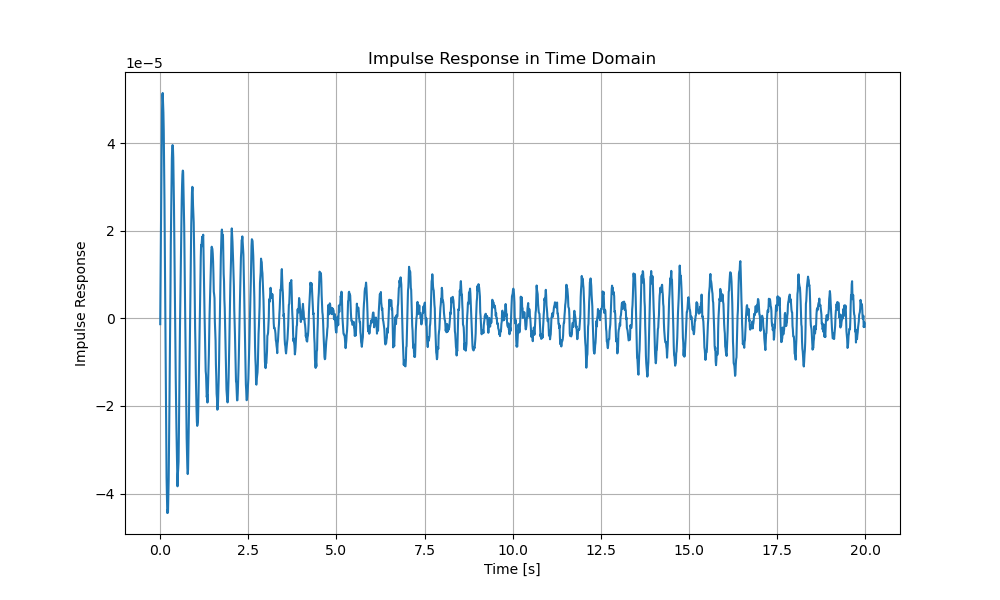

In [15]:
# Calculate the impulse response
irf = fft.ifft(frf).real

# Plot impulse response in time domain
plt.figure(figsize=(10, 6))
plt.plot(t_vector, irf)
plt.xlabel("Time [s]")
plt.ylabel("Impulse Response")
plt.grid(True)
plt.title("Impulse Response in Time Domain")
plt.show()

Comparing the obtained IRF to the impulse response observed in the first part of the notebook we can discuss both successes and limitations of our approach.

On the positive side, the recovered IRF clearly shows the fundamental characteristics we expect from a lightly damped second-order system. We can see a decaying oscillatory response with a period of approximately 0.3 seconds (not too far from the true natural frequency of around 3.6 Hz). The decay envelope suggests the presence of damping, which is physically correct for our system.

However, the signal quality isn't perfect. While the early part of the response (roughly the first 2-3 seconds) shows a relatively clean exponential decay, the later portion becomes increasingly noisy with what appears to be high-frequency oscillations superimposed on the main response. This noise is a direct consequence of the issues we observed in our FRF estimation - both the irregular input/output spectra and the numerical problems in spectral division have propagated through the inverse Fourier transform into our time-domain response.

What does this mean for LSCE parameter estimation? The LSCE algorithm works by fitting a model to the IRF data, and the quality of this fit depends on the cleanliness of our data. The algorithm might struggle with the noisy latter portion of the signal, but we have two factors working in our favor:

1. The early part of the response, which is crucial for determining the system's primary dynamic characteristics, is relatively clean. Since this portion contains the highest energy content of the response, it will have the strongest influence on the parameter estimation.

2. The LSCE algorithm uses a least-squares approach, which can help mitigate the effects of random noise by finding the best average fit to the data.

Nevertheless, we might expect our parameter estimates to be less accurate than those we obtained from direct impulse testing. To improve the results, we might consider:
- Applying a windowing function to focus on the cleaner early portion of the response
- Using more sophisticated spectral estimation techniques to obtain a cleaner FRF before computing the IRF
- Increasing the measurement time or averaging multiple measurements to reduce noise in our original spectral estimates

Despite these limitations, we are going to apply the LSCE algorithm to the obtained IRF and see how well it can identify the system's natural frequency and damping ratio.

### Parameter Estimation <a name="parameter-estimation-random"></a>

Let's feed the obtained impulse response data to the `estimate_lsce_parameters` function to estimate the $\beta$ coefficients. We then use the `estimate_modal_parameters` function to calculate the natural frequency and damping ratio of the system from the $\beta$ coefficients.

Finally, we compare the predicted estimated modal parameters with the true values and print the results.

In [16]:
# Estimate LSCE parameters
beta_0, beta_1 = estimate_lsce_parameters(irf)

# Estimate modal parameters
omega, zeta = estimate_modal_parameters(beta_0, beta_1, f_sampling)

# Compare measured and estimated modal parameters
print(
    f"""
Natural frequency
- true: {true_natural_frequency:.2f} rad/s
- estimated: {omega:.2f} rad/s
Percentage difference: {(omega - true_natural_frequency) / true_natural_frequency * 100:.2f}%

Damping ratio
- true: {true_damping_ratio: .2f}
- estimated: {zeta:.2f}
Perncetage difference: {(zeta - true_damping_ratio) / true_damping_ratio * 100:.2f}%
"""
)


Natural frequency
- true: 22.36 rad/s
- estimated: 25.74 rad/s
Percentage difference: 15.13%

Damping ratio
- true:  0.02
- estimated: 0.53
Perncetage difference: 2587.15%



The LSCE parameter estimation results from our recovered IRF show significant deviations from the true system parameters, particularly for the damping ratio. While the natural frequency estimate is off by about 15% - not ideal but also not incredibly far - the estimated damping ratio is dramatically higher than the true value, showing an error of over 2500%.

These poor results can be understood by examining how we obtained our IRF. The process involved taking random excitation data, computing input and output spectra, dividing these to get the FRF, and finally performing an inverse Fourier transform. At each step, we introduced uncertainties and errors that compounded in our final IRF. The severe overestimation of damping is particularly telling - it suggests that our recovered IRF is decaying much faster than it should, likely due to the noise contamination we observed in the latter portion of the signal.

To improve these results, we can increase our measurement time. This solution addresses several key issues in our measurement and analysis process:

First, let's understand how increasing measurement time affects our frequency resolution. When we perform a Fourier transform on a time signal of length $t_\mathrm{span}$, our frequency spacing is $\Delta f = 1/t_\mathrm{span}$. With a longer measurement time, we get finer frequency resolution in our spectra. This means we can better resolve the sharp peak near our natural frequency, leading to a more accurate representation of the system's resonant behavior.

Second, increased measurement time helps with our random excitation. Remember that we're seeing a single realization of a random process. With a longer measurement, we're essentially averaging over more cycles of the system's response. Think of it like taking a longer time to observe a coin flip experiment - the more flips we observe, the closer our measured probability gets to the true probability. Similarly, a longer measurement helps our input spectrum approach the ideal flat spectrum we want from random excitation.

Third, better frequency resolution has a direct impact on our IRF quality. The inverse Fourier transform that gives us our IRF depends on how well we've captured the system's frequency response. With finer frequency resolution, we can more accurately reconstruct the time-domain behavior, particularly the subtle decay characteristics that determine our damping ratio. The relationship between frequency resolution and time-domain accuracy is fundamental - it's like trying to draw a smooth curve through dots on a graph. The more dots we have (finer frequency resolution), the more accurately we can reproduce the true curve (our IRF).

Furthermore, better frequency resolution helps mitigate the numerical problems we encountered in spectral division. With more frequency points, we're less likely to miss important features of the system's response, and our FRF estimate becomes more reliable across the entire frequency range of interest.

Let's define the function `execute_lsce_system_identification` that performs the entire process of applying the FFT to the random response data, computing the FRF, obtaining the IRF, estimating the modal parameters with the LSCE algorithm, and comparing the results with the true values.

In [17]:
def execute_lsce_system_identification(input_signal, output_signal, f_sampling):
    """
    Execute system identification using Least Squares Complex Exponential (LSCE) method

    Parameters:
    input_signal (array): Input signal
    output_signal (array): Output signal
    f_sampling (float): Sampling frequency [Hz]

    Returns:
    float: Estimated natural frequency
    float: Estimated damping ratio
    """
    # Calculate FFT for input signal
    input_fft = fft.fft(input_signal)

    # Calculate FFT for output signal
    output_fft = fft.fft(output_signal)

    # Get frequencies corresponding to the FFT
    frequencies = fft.fftfreq(len(input_signal), 1 / f_sampling)

    # Plot input spectrum
    plot_magnitude_spectrum(frequencies, input_fft, "Input Force")
    plt.show()

    # Plot output spectrum
    plot_magnitude_spectrum(frequencies, output_fft, "Output Displacement")
    plt.show()

    # Calculate FRF
    frf = output_fft / input_fft

    # Plot FRF
    _, _ = plot_spectrum(frequencies, frf, "FRF")
    plt.show()

    # Calculate the impulse response
    irf = fft.ifft(frf).real

    # Plot impulse response in time domain
    t_vector = np.arange(0, len(input_signal) / f_sampling, 1 / f_sampling)
    plt.figure(figsize=(10, 6))
    plt.plot(t_vector, irf)
    plt.xlabel("Time [s]")
    plt.ylabel("Impulse Response")
    plt.grid(True)
    plt.title("Impulse Response in Time Domain")
    plt.show()

    # Estimate LSCE parameters
    beta_0, beta_1 = estimate_lsce_parameters(irf)

    # Estimate modal parameters
    omega, zeta = estimate_modal_parameters(beta_0, beta_1, f_sampling)

    # Compare measured and estimated modal parameters
    omega_error = omega/true_natural_frequency - 1
    zeta_error = zeta/true_damping_ratio - 1
    print(
        f"""
    Natural frequency
    - true: {true_natural_frequency:.2f} rad/s
    - estimated: {omega:.2f} rad/s
    Percentage difference: {omega_error * 100:.2f}%

    Damping ratio
    - true: {true_damping_ratio: .2f}
    - estimated: {zeta:.2f}
    Perncetage difference: {zeta_error * 100:.2f}%
    """
    )

    # Return estimated modal parameters
    return frequencies, frf, omega_error, zeta_error

Now let's generate new random response data with a longer measurement time of 200 seconds and apply the LSCE algorithm to identify the system's modal parameters.

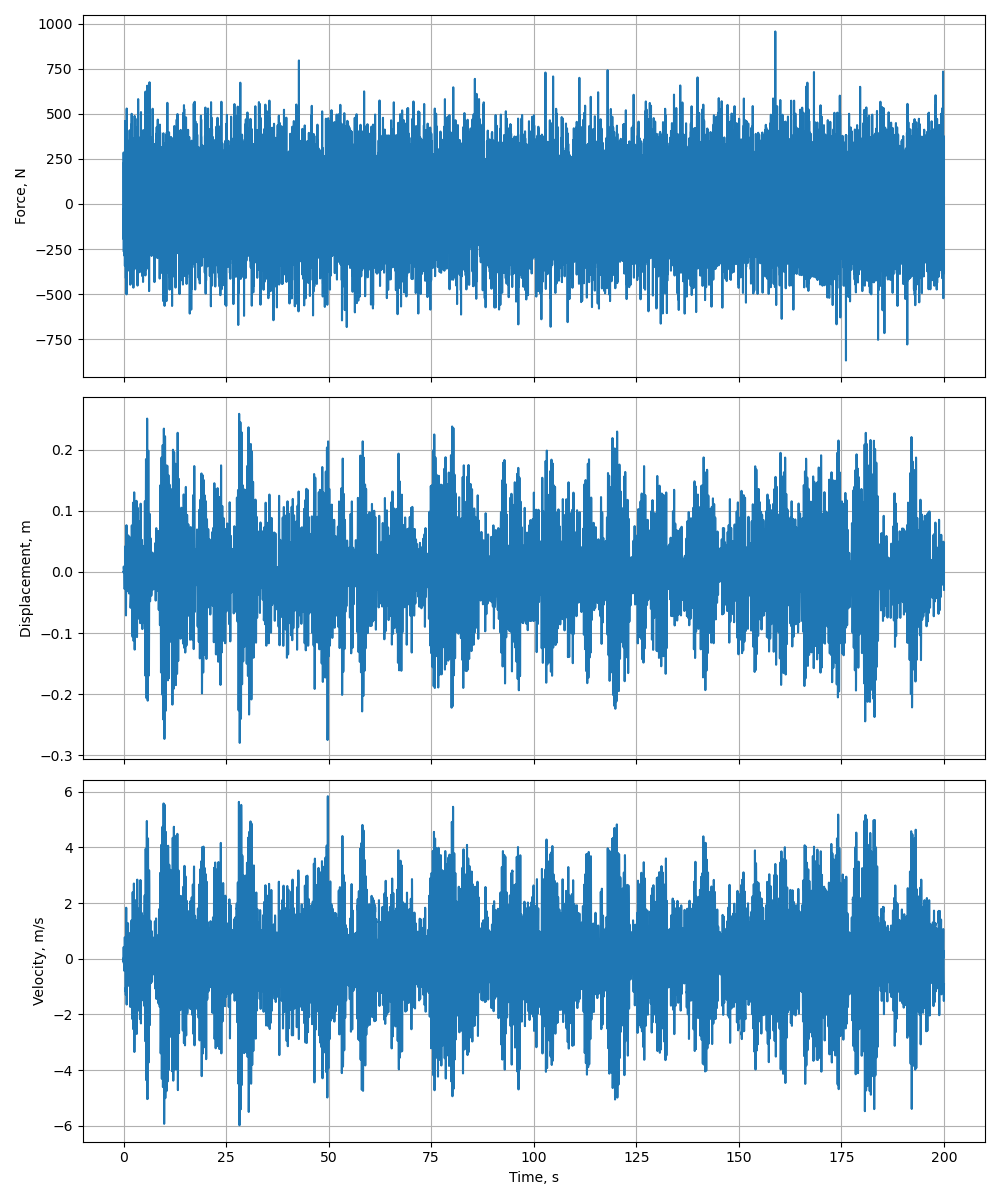

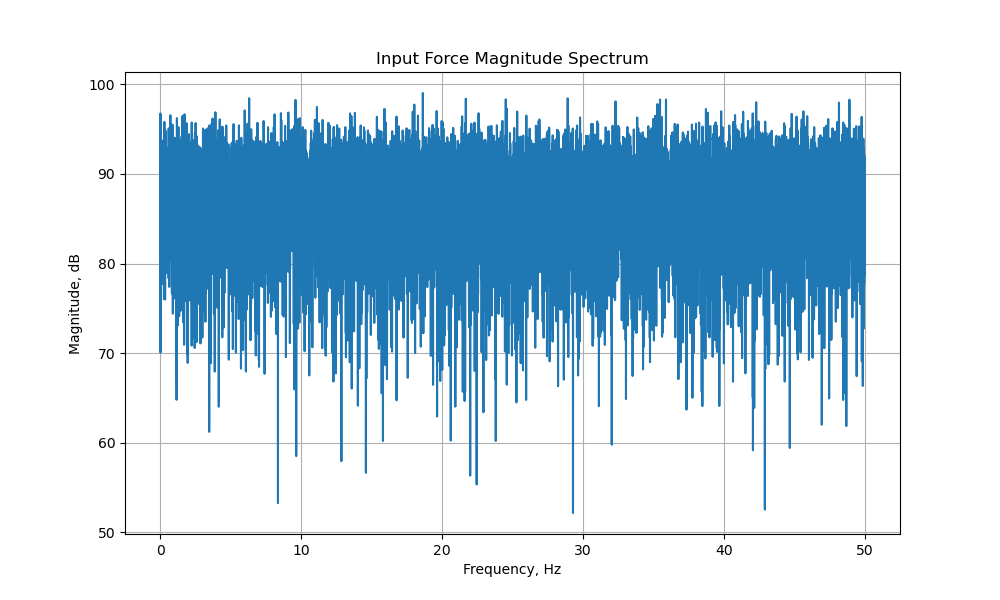

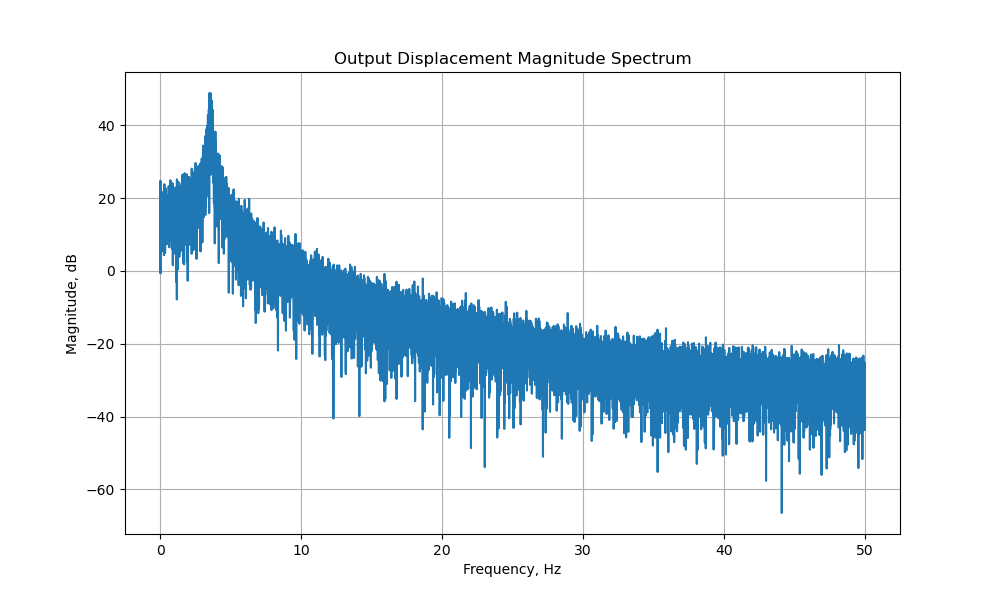

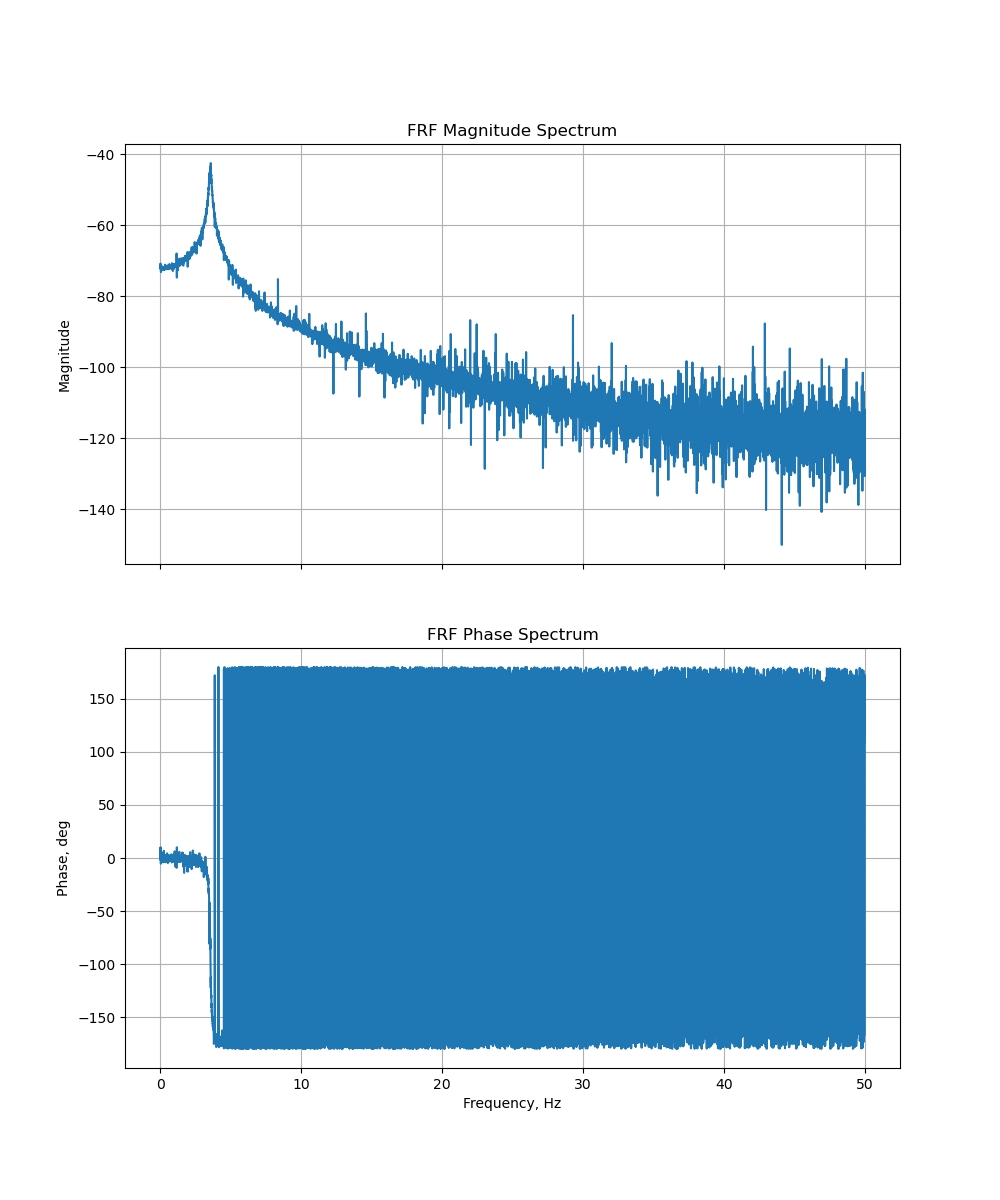

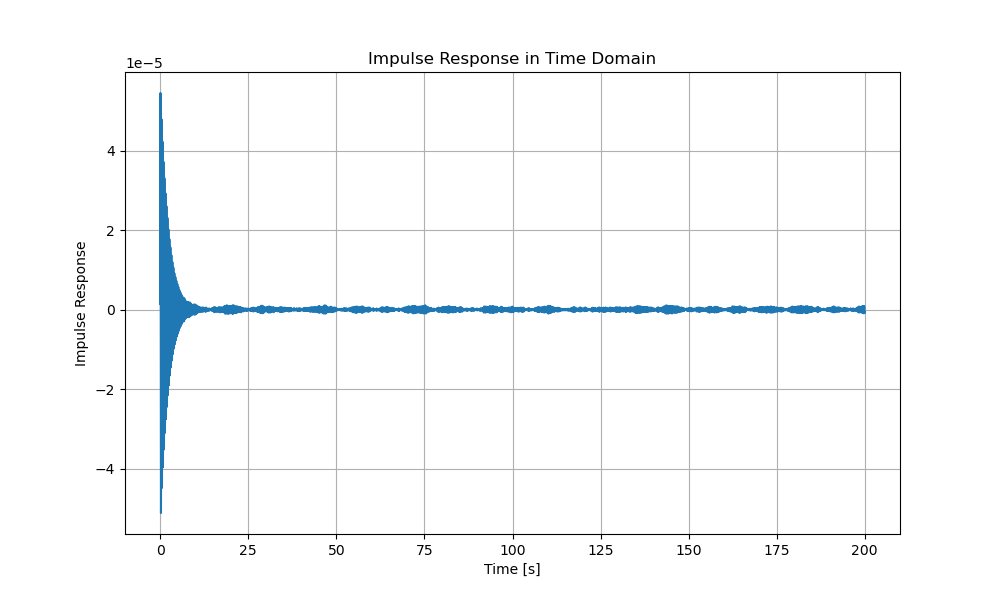


    Natural frequency
    - true: 22.36 rad/s
    - estimated: 22.33 rad/s
    Percentage difference: -0.12%

    Damping ratio
    - true:  0.02
    - estimated: 0.02
    Perncetage difference: -11.44%
    


In [18]:
# Generate longer random force signal
t_span_long = 200  # [s]
t_vector_long = np.arange(0, t_span_long, 1 / f_sampling)  # time vector [s]
random_signal_long = np.random.normal(
    size=len(t_vector_long)
)  # random signal with normal distribution centered at 0
random_force_signal_long = random_signal_long * (
    force_rms / np.sqrt(np.mean(random_signal_long**2))
)  # scale random signal to desired RMS [N]

# Create interpolated force function
random_force_function_long = interp1d(
    t_vector_long, random_force_signal_long, bounds_error=False, fill_value=0
)

# Solve ODE
solution = odeint(
    mass_spring_damper, initial_state, t_vector_long, args=(random_force_function_long,)
)

# Extract displacement and velocity
random_displacement_long = solution[:, 0]
random_velocity_long = solution[:, 1]

# Create figure with three subplots
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 12))

# Plot force
axes[0].plot(t_vector_long, random_force_signal_long)
axes[0].set_ylabel("Force, N")
axes[0].grid(True)

# Plot displacement
axes[1].plot(t_vector_long, random_displacement_long)
axes[1].set_ylabel("Displacement, m")
axes[1].grid(True)

# Plot velocity
axes[2].plot(t_vector_long, random_velocity_long)
axes[2].set_ylabel("Velocity, m/s")
axes[2].grid(True)
axes[2].set_xlabel("Time, s")

# Set layout and show plot
plt.tight_layout()
plt.show()

# Execute system identification
frequencies, frf, natural_frequency_error, damping_ratio_error = execute_lsce_system_identification(
    random_force_signal_long, random_displacement_long, f_sampling
)

The results obtained with the longer measurement time show a dramatic improvement in our modal parameter estimation. Let's analyze what we see in both the intermediate steps and final results.

Looking at the frequency-domain data first, we can see that the longer measurement time has given us much finer frequency resolution. In the input force spectrum, while we still see the natural variations inherent to random excitation, these variations are now more densely sampled. The output displacement spectrum also shows this finer sampling, and interestingly, the variations in magnitude now appear more uniform across the entire frequency range. This is in contrast to our previous results, where the spectrum appeared smoother at high frequencies due to the system's natural filtering behavior (strong attenuation of displacements at high frequencies). The more uniform appearance of variations in our new measurement suggests that we're seeing a more consistent representation of how our system responds to random excitation across all frequencies. This result has been enabled by the fact that the longer excitation signal contains also larger amplitude components at higher frequencies, which were not present in the shorter signal.

The FRF estimate shows notable improvements, but also reveals some persistent challenges. The magnitude spectrum is much cleaner in the low-frequency region, especially around the resonance peak, which is crucial for accurate parameter estimation. However, at higher frequencies, we still see significant noise. This noise persists because of fundamental limitations in discrete-time signal processing. As we approach the Nyquist frequency (50 Hz in our case), the nonlinear mapping between continuous and discrete frequencies makes our FRF estimation increasingly sensitive to numerical errors. This effect, combined with the random variations in our input and output spectra, leads to the noisy high-frequency behavior we observe.

The phase spectrum tells a more complex story. We can now clearly see the characteristic phase behavior of a second-order system in the low-frequency region: a smooth transition from $0°$ at low frequencies, through $-90°$ at resonance, towards $-180°$ at higher frequencies. However, beyond this region, the phase appears again to jump erratically between $-180°$ and $+180°$. These jumps occur due to two combined effects: First, as we approach the Nyquist frequency, the nonlinear mapping between continuous and discrete frequencies makes our phase estimation more sensitive to numerical errors. Second, we're seeing again phase wrapping in action. When combined with our frequency warping effects, this creates the apparently erratic behavior we observe in the high-frequency region.

The improvement in our frequency-domain data has translated to a much better IRF estimate, particularly in the crucial early portion that captures the system's primary dynamics. However, we still observe some noise after the initial decay, albeit with much smaller magnitude than in our previous attempt. This persistent noise is a direct consequence of the high-frequency noise in our FRF - when we perform the inverse Fourier transform, the noisy high-frequency components manifest as small oscillations superimposed on our main impulse response.

The final modal parameter estimates reflect these improvements:
- The natural frequency estimate has improved from a 15% error to just -0.12% error
- The damping ratio estimate has improved from a 2587% error to just -11.44% error

This improvement in accuracy, particularly for the damping ratio, shows that measurement time is crucial in experimental modal analysis. The longer measurement has allowed us to:
1. Better resolve the frequency content in the critical low-frequency region where our system's primary dynamics live
2. More accurately capture the true decay rate in our IRF
3. Average out the effects of random variations in our excitation
4. Reduce the impact of numerical issues in our spectral calculations, particularly in the frequency range of interest

While we haven't eliminated all sources of noise - and indeed, some are inherent to the random excitation approach - we've significantly improved our ability to extract the system's fundamental characteristics. This underscores a key principle in experimental modal analysis: while perfect measurements might be impossible, longer measurement times can help us focus our accuracy where it matters most - in the frequency range where our system's primary dynamics occur.

At the same time, we still see a relatively large error in the identified damping ratio (around -11%). We could theoretically reduce this error further by taking even longer measurements, but this approach quickly becomes impractical in real experimental settings due to facility availability constraints, instrumentation limitations, and the need to complete comprehensive test matrices within reasonable timeframes.

Instead, we can improve our estimation through more sophisticated signal processing of our existing 200-second dataset. Specifically, we'll apply a Savitzky-Golay filter to our FRF before performing the modal parameter estimation.

The Savitzky-Golay filter is a digital filter that fits successive sub-sets of adjacent data points with a low-degree polynomial using the linear least squares method. Think of it as fitting a small window of data points with a polynomial - as this window slides along our data, each point gets replaced by the value of the polynomial at that position.

The Savitzky-Golay filter has some unique properties that make it ideal for this application:

1. It preserves higher moments of the data while removing noise, meaning it can smooth the FRF without significantly distorting the critical peak shape that determines our damping estimate.

2. Unlike simpler moving average filters, it won't artificially widen the resonance peak, which would lead to overestimation of the damping ratio - a particular concern for our lightly damped system ($\zeta\approx0.02$).

3. When applied in the frequency domain, it can help reduce the impact of both the irregular input spectrum and numerical issues from spectral division, both of which contribute to noise in our FRF estimate.

The effectiveness of this approach stems from the relationship between the FRF's resonance peak characteristics and the system's damping. In a second-order system like our mass-spring-damper, the width and steepness of the resonance peak directly relate to the damping ratio. By carefully smoothing the FRF, we can potentially get a more accurate representation of these characteristics while preserving the underlying system dynamics.

However, care must be taken in selecting appropriate filter parameters. Over-smoothing could artificially alter the peak shape, leading to incorrect damping estimates. We need to strike a balance between noise reduction and preservation of the true system response. In addition, when applying the Savitzky-Golay filter to FRFs, two key considerations ensure physically meaningful results.

First, the filter should be applied separately to the real and imaginary parts of the FRF, rather than to its magnitude and phase. This approach preserves the linear properties of the system and avoids distortions that could arise from filtering the nonlinear combinations represented by magnitude and phase. Filtering magnitude and phase separately is particularly problematic because, as observed, phase data may contain $2\pi$ discontinuities that can severely affect the polynomial fitting inherent to the Savitzky-Golay method.

Second, the filtering should be applied only to the positive-frequency portion of the spectrum, after which the negative-frequency portion should be constructed using complex conjugate symmetry (where $H(-f) = H^*(f)$). This two-step process is crucial because filtering the full spectrum could introduce small numerical errors that break the conjugate symmetry property, potentially resulting in non-physical imaginary components in the computed IRF. By filtering only the positive frequencies and then enforcing conjugate symmetry, we ensure that the inverse Fourier transform will yield a purely real-valued impulse response, as required by the physics of the system.

Together, these practices ensure that the smoothing effect of the Savitzky-Golay filter is achieved while maintaining the mathematical properties necessary for subsequent modal analysis steps.

Now we are going to apply a Savitzky-Golay filter of order 3 and window length 125 to the positive-frequency portion of the FRF, reconstruct the full FRF using complex conjugate symmetry, and then apply the inverse Fourier transform to obtain the smoothed impulse response. We then estimate the modal parameters and compare the results with the true values.

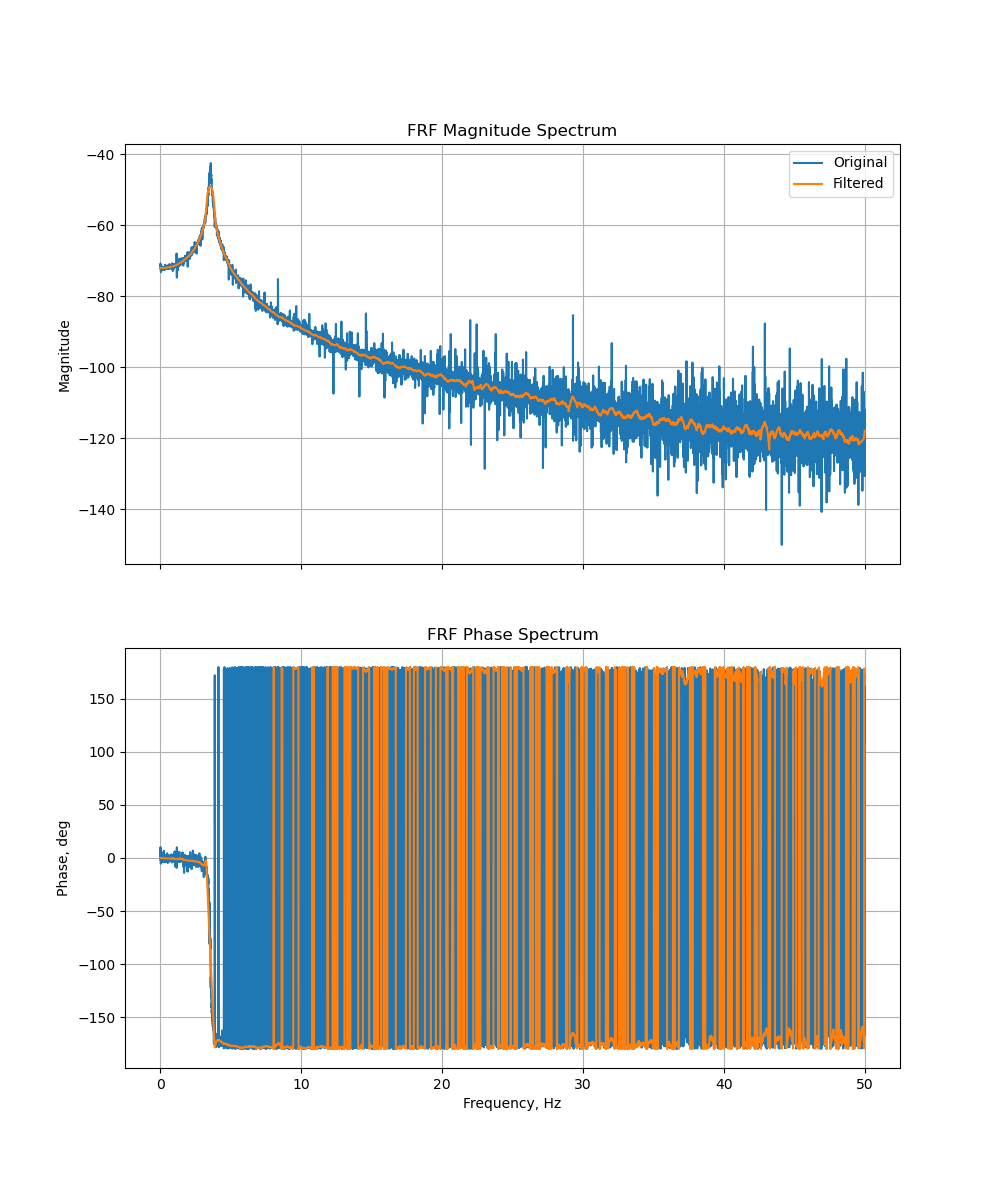

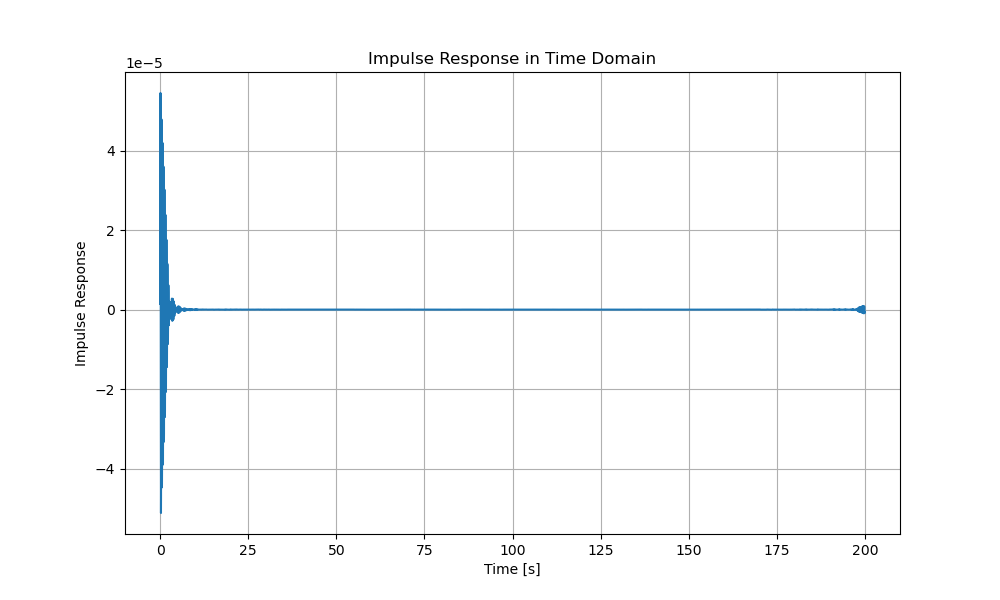


Natural frequency
- true: 22.36 rad/s
- estimated: 22.32 rad/s
Percentage difference: -0.20%

Damping ratio
- true:  0.02
- estimated: 0.02
Percentage difference: -0.62%



In [19]:
from scipy import signal

# Get positive-frequency portion of the FRF
pos_mask = frequencies >= 0
pos_freqs = frequencies[pos_mask]
pos_spectrum = frf[pos_mask]

# Apply Savitzky-Golay filter for smoothing
window_length = 125
polyorder = 3
real_filtered = signal.savgol_filter(pos_spectrum.real, window_length, polyorder)
imag_filtered = signal.savgol_filter(pos_spectrum.imag, window_length, polyorder)
pos_spectrum_filtered = real_filtered + 1j * imag_filtered

# Plot original FRF to compare with filtered FRF
fig, axes = plot_spectrum(frequencies, frf, "FRF")

# Calculate magnitude and phase of the filtered FRF
magnitude_db = 20 * np.log10(np.abs(pos_spectrum_filtered))
phase = np.angle(pos_spectrum_filtered, deg=True)

# Plot magnitude
axes[0].plot(pos_freqs, magnitude_db)
axes[0].legend(["Original", "Filtered"])

# Plot phase
axes[1].plot(pos_freqs, phase)

# Show plot
plt.show()

# Create full spectrum by complex conjugate symmetry
full_spectrum = np.concatenate(
    [pos_spectrum_filtered, pos_spectrum_filtered.conj()[1:-1][::-1]]
)

# Calculate the impulse response
irf = fft.ifft(full_spectrum).real

# Plot impulse response in time domain
plt.figure(figsize=(10, 6))
plt.plot(t_vector_long[:-2], irf)
plt.xlabel("Time [s]")
plt.ylabel("Impulse Response")
plt.grid(True)
plt.title("Impulse Response in Time Domain")
plt.show()

# Estimate LSCE parameters
beta_0, beta_1 = estimate_lsce_parameters(irf)
omega, zeta = estimate_modal_parameters(beta_0, beta_1, f_sampling)

# Compare measured and estimated modal parameters
print(
    f"""
Natural frequency
- true: {true_natural_frequency:.2f} rad/s
- estimated: {omega:.2f} rad/s
Percentage difference: {(omega - true_natural_frequency) / true_natural_frequency * 100:.2f}%

Damping ratio
- true: {true_damping_ratio: .2f}
- estimated: {zeta:.2f}
Percentage difference: {(zeta - true_damping_ratio) / true_damping_ratio * 100:.2f}%
"""
)

The application of the Savitzky-Golay filter to our FRF has led to a substantial improvement in the estimation of the damping ratio. Looking at the plots, we can see clear evidence of why this approach was successful.

In the FRF magnitude plot, the filter has effectively smoothed out the noisy variations while preserving the essential shape of the resonance peak. This is particularly evident in the high-frequency region (above 10 Hz) where the original FRF showed significant jagged variations that have been replaced by a smooth trend line. Crucially, in the region around our natural frequency ($\approx3.6$ Hz), the filter has maintained the peak shape while removing small perturbations that could affect our damping estimation.

The impact of this filtering is reflected in our numerical results. While the natural frequency estimate remains excellent with only a $-0.20%$ error (compared to $-0.12%$ previously), the real success is in the damping ratio estimation. The error has been reduced from $-11.44%$ to just $-0.62%$ - an improvement of more than an order of magnitude.

This improvement in damping estimation accuracy can be attributed to two key factors:
1. The Savitzky-Golay filter's ability to preserve higher-order moments while removing noise means we've maintained the true shape of the resonance peak - crucial for damping estimation
2. The smoother FRF has led to a cleaner IRF, as seen in the time-domain plot. The decay envelope is now much cleaner, especially in the latter portion where noise was previously more evident

The phase spectrum, while still showing jumps between -180° and +180° at high frequencies (an unavoidable characteristic of phase unwrapping), appears more consistent in its transitions. This improved phase behavior likely contributed to better overall system identification.

However, you might be wondering how we chose a window length of 125 for our Savitzky-Golay filter. This choice was based on a trade-off between noise reduction and peak preservation. Longer windows would provide more smoothing but could potentially distort the peak shape, while shorter windows might not remove enough noise. We can explore this trade-off by varying the window length and observing its impact on the percentage error in our natural frequency and damping ratio estimates.

For this purpose, we define the function `window_length_to_error` that takes as input a window length, applies the Savitzky-Golay filter to the positive-frequency portion of the FRF, reconstructs the full FRF using complex conjugate symmetry, and then applies the inverse Fourier transform to obtain the smoothed impulse response. The function then estimates the modal parameters and returns the absolute value of the percentage errors in the natural frequency and damping ratio estimates.

In [20]:
def window_length_to_error(window_length, pos_spectrum, pos_freqs):
    """
    Calculate error between original and smoothed FRF for a given window length

    Parameters:
    window_length (int): Savitzky-Golay filter window length
    pos_spectrum (array): Complex spectrum values
    pos_freqs (array): Positive frequencies

    Returns:
    float: Error between original and smoothed FRF
    """
    # Apply Savitzky-Golay filter for smoothing
    polyorder = 3
    real_filtered = signal.savgol_filter(pos_spectrum.real, window_length, polyorder)
    imag_filtered = signal.savgol_filter(pos_spectrum.imag, window_length, polyorder)
    pos_spectrum_filtered = real_filtered + 1j * imag_filtered

    # Calculate full spectrum
    full_spectrum = np.concatenate(
        [pos_spectrum_filtered, pos_spectrum_filtered.conj()[1:-1][::-1]]
    )

    # Calculate the impulse response
    irf = fft.ifft(full_spectrum).real

    # Estimate LSCE parameters
    beta_0, beta_1 = estimate_lsce_parameters(irf)

    # Estimate modal parameters
    omega, zeta = estimate_modal_parameters(beta_0, beta_1, f_sampling)

    # Calculate relative error
    omega_error = np.abs((omega - true_natural_frequency) / true_natural_frequency)
    zeta_error = np.abs((zeta - true_damping_ratio) / true_damping_ratio)

    return omega_error, zeta_error

We define a range of window lengths from 5 to 250 and calculate the percentage errors in the natural frequency and damping ratio estimates for each length. We then plot these errors as a function of the window length to visualize how the choice of window length affects the accuracy of our parameter estimates.

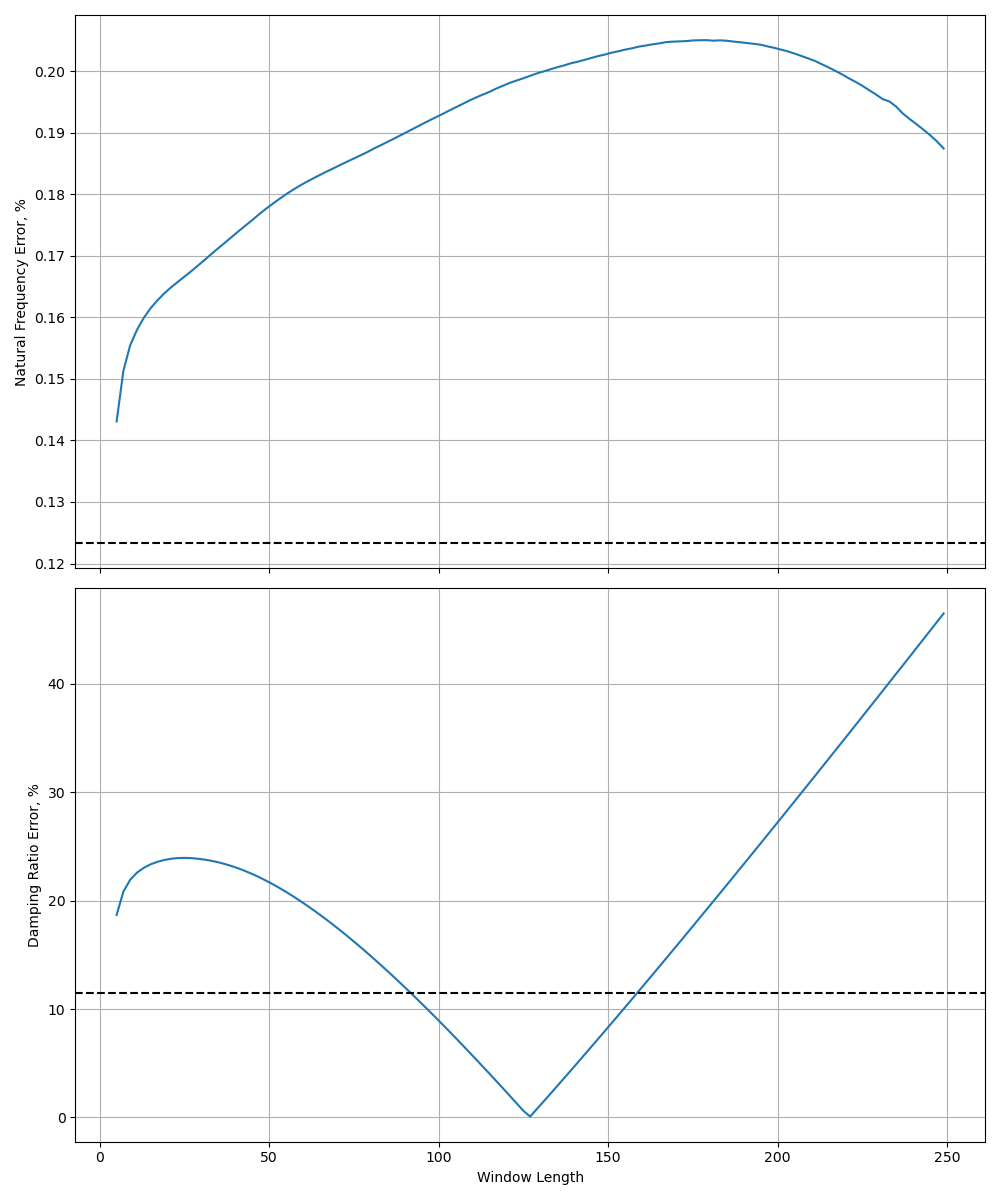

In [21]:
# Calculate errors for different window lengths
window_lengths = np.arange(5, 250, 2)
omega_errors = np.zeros_like(window_lengths, dtype=float)
zeta_errors = np.zeros_like(window_lengths, dtype=float)
for i, window_length in enumerate(window_lengths):
    omega_errors[i], zeta_errors[i] = window_length_to_error(
        window_length, pos_spectrum, pos_freqs
    )

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot omega error
axes[0].plot(window_lengths, omega_errors*100)
axes[0].axhline(np.abs(natural_frequency_error)*100, color="k", linestyle="--")
axes[0].set_ylabel("Natural Frequency Error, %")
axes[0].grid(True)

# Plot zeta error
axes[1].plot(window_lengths, zeta_errors*100)
axes[1].axhline(np.abs(damping_ratio_error)*100, color="k", linestyle="--")
axes[1].set_ylabel("Damping Ratio Error, %")
axes[1].set_xlabel("Window Length")
axes[1].grid(True)

# Set layout and show plot
plt.tight_layout()
plt.show()

For the natural frequency, we observe that filtering consistently produces slightly larger errors compared to the unfiltered case (0.12%), though still maintaining excellent accuracy with errors below 0.25%. This makes sense because the natural frequency is primarily determined by the location of the resonance peak, and any smoothing operation, even if gentle, can slightly shift this peak position.

The damping ratio shows a much more interesting behavior with respect to window length. We can identify three distinct regions:

1. **Short Windows (0-100 points)**: Surprisingly, in this region we see relatively high errors around 20-25%, even higher than the unfiltered case (11.44%). This counterintuitive result stems from how short-window filtering affects our signal. When we apply a Savitzky-Golay filter with a very small window, we're essentially fitting polynomials to just a few points at a time. While this does provide some local smoothing, it also introduces artificial structures into our signal at the scale of the window length.

   Think of trying to determine the shape of a coastline. A noisy satellite image (like our unfiltered FRF) shows the true coastline plus random noise. Now imagine instead a map where someone has approximated the coast with small straight line segments. Even though each segment is "smoother" than the noisy image, the artificial corners and transitions between segments might actually make it harder to determine the true coastal shape. Similarly, the systematic distortions introduced by small-window filtering can interfere more significantly with our damping estimation than random measurement noise, which tends to average out when fitting our model.

2. **Optimal Range (100-150 points)**: Here we find a sweet spot where the error drops dramatically, reaching a minimum at 127 points with an error of 0.08%. This window length provides the optimal balance between noise reduction and shape preservation. The window is now large enough to actually capture the underlying structure of our resonance peak, allowing us to truly smooth noise while preserving the essential shape that carries the damping information.

3. **Large Windows (>150 points)**: As the window length increases further, we see a sharp rise in error, eventually exceeding 40%. This occurs because we're over-smoothing the data. Large windows start to "flatten" the resonance peak, making it appear broader than it really is. Since damping ratio is directly related to the peak width, this artificial broadening leads to overestimated damping values.

This behavior aligns perfectly with our theoretical understanding of damping estimation. Remember that damping is determined by the shape and width of the resonance peak. Too little smoothing introduces systematic distortions that can be worse than random noise, while too much smoothing artificially widens the peak. The optimal window length corresponds to where we remove most of the noise while maintaining the true peak shape that reflects the system's actual damping characteristics.

These results underscore the importance of careful filter parameter selection when processing FRF data for modal analysis. While filtering can dramatically improve our damping estimates, the window length must be chosen with care - in our case, a window of around 125 points provides optimal results, reducing our damping estimation error from 11.44% to less than 1%.

### Model Validation <a name="model-validation-random"></a>

Finally, we validate the identified model by comparing the predicted output with the measured output of a different impulse response dataset. We use the same non-zero initial displacement dataset employed in the first part of the notebook and we plot the measured and predicted output responses.

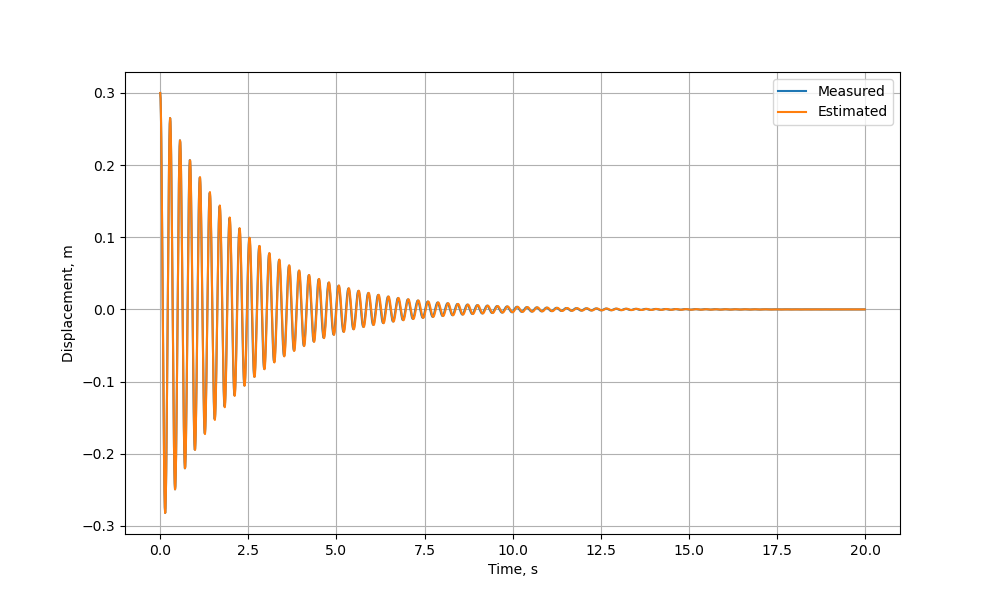

In [22]:
t_vector = np.arange(0, t_span, 1 / f_sampling)  # time vector [s]
compare_output(impulse_displacement, beta_0, beta_1, t_vector)
plt.show()

We can see that the two responses are almost perfectly aligned, indicating that our identified model accurately captures the system's behavior.

## Conclusion <a name="conclusion"></a>

***

In this notebook, we've explored the Least Squares Complex Exponential (LSCE) algorithm for identifying the modal parameters of a mass-spring-damper system. Our journey has taken us through two different approaches: direct impulse response testing and random excitation testing.

The direct impulse response testing proved highly effective, yielding almost perfect parameter estimates. However, this approach, while theoretically elegant, highlighted a practical challenge - obtaining clean impulse responses in real experimental settings can be difficult.

This led us to explore random excitation testing, which is often more practical but introduces its own complexities. Our investigation revealed several key insights:

1. The relationship between time and frequency domains is fundamental. By leveraging the properties of Linear Time-Invariant systems and the Fourier transform, we were able to extract impulse response data from random excitation measurements.

2. Measurement time significantly affects estimation accuracy. Increasing our measurement time from 20 to 200 seconds dramatically improved our results, reducing the natural frequency error from 15% to just 0.12%. This improvement stems from better frequency resolution and more averaged cycles of system response.

3. Signal processing techniques can further enhance results. By applying a Savitzky-Golay filter to our frequency response function, we reduced the damping ratio error from 11.44% to less than 1%. However, this required careful selection of filter parameters, demonstrating the delicate balance between noise reduction and signal preservation.

Most importantly, we've seen that while perfect measurements might be unattainable, combining appropriate measurement techniques with careful signal processing can yield highly accurate parameter estimates. The success of our final approach - using long-duration random excitation with optimized filtering - suggests a practical pathway for real-world modal analysis applications.

These findings have broader implications for experimental modal analysis, particularly for aerospace structures where accurate parameter estimation is crucial for predicting dynamic behavior. In the next notebook, we are going to extend the techniques and insights to systems with multiple degrees of freedom, and we are going to start discussing the idenfitication of the mode shapes of the system.